In [1]:
#EDA ON  HOUSE PRICES

In [85]:
 import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import scipy as sts
from scipy import stats
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor

import warnings
warnings.filterwarnings('ignore')

In [86]:
train = pd.read_excel('housing_train.xlsx')
train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    127         120       RL          NaN     4928   Pave   NaN      IR1   
1    889          20       RL         95.0    15865   Pave   NaN      IR1   
2    793          60       RL         92.0     9920   Pave   NaN      IR1   
3    110          20       RL        105.0    11751   Pave   NaN      IR1   
4    422          20       RL          NaN    16635   Pave   NaN      IR1   
5   1197          60       RL         58.0    14054   Pave   NaN      IR1   
6    561          20       RL          NaN    11341   Pave   NaN      IR1   
7   1041          20       RL         88.0    13125   Pave   NaN      Reg   
8    503          20       RL         70.0     9170   Pave   NaN      Reg   
9    576          50       RL         80.0     8480   Pave   NaN      Reg   
10   449          50       RM         50.0     8600   Pave   NaN      Reg   
11   833          60       RL         44.0     9548   Pave   NaN      IR1   
12   277          20       RL        129.0     9196   Pave   NaN      IR1   
13    84          20       RL         80.0     8892   Pave   NaN      IR1   
14   888          50       RL         59.0    16466   Pave   NaN      IR1   
15  1013          70       RL         55.0    10592   Pave   NaN      Reg   
16  1154          30       RM          NaN     5890   Pave   NaN      Reg   
17   728          20       RL         64.0     7314   Pave   NaN      Reg   
18   270          20       RL          NaN     7917   Pave   NaN      IR1   
19  1105         160       RM         24.0     2016   Pave   NaN      Reg   
20   259          60       RL         80.0    12435   Pave   NaN      Reg   
21  1407          85       RL         70.0     8445   Pave   NaN      Reg   
22  1459          20       RL         68.0     9717   Pave   NaN      Reg   
23   997          20       RL          NaN    10659   Pave   NaN      IR1   
24  1094          20       RL         71.0     9230   Pave   NaN      Reg   
25   114          20       RL          NaN    21000   Pave   NaN      Reg   
26  1384          30       RL          NaN    25339   Pave   NaN      Reg   
27   379          20       RL         88.0    11394   Pave   NaN      Reg   
28   556          45       RM         58.0     6380   Pave   NaN      Reg   
29   464          70       RL         74.0    11988   Pave   NaN      IR1   
30    46         120       RL         61.0     7658   Pave   NaN      Reg   
31   426          60       RM         60.0     3378   Pave  Grvl      Reg   
32  1231          90       RL          NaN    18890   Pave   NaN      IR1   
33   171          50       RM          NaN    12358   Pave   NaN      IR1   
34   869          60       RL          NaN    14762   Pave   NaN      IR2   
35   151          20       RL        120.0    10356   Pave   NaN      Reg   
36   859          20       RL         80.0    10400   Pave   NaN      Reg   
37   176          20       RL         84.0    12615   Pave   NaN      Reg   
38   361          85       RL          NaN     7540   Pave   NaN      IR1   
39   590          40       RM         50.0     9100   Pave   NaN      Reg   
40   172          20       RL        141.0    31770   Pave   NaN      IR1   
41   527          20       RL         70.0    13300   Pave   NaN      Reg   
42  1365         160       FV         30.0     3180   Pave  Pave      Reg   
43   146         160       RM         24.0     2522   Pave   NaN      Reg   
44  1006          80       RL         65.0     8385   Pave   NaN      Reg   
45   275          20       RL         76.0     8314   Pave   NaN      Reg   
46   380          60       RL         60.0     8123   Pave   NaN      IR1   
47  1309          20       RM        100.0    12000   Pave   NaN      Reg   
48   534          20       RL         50.0     5000   Pave   NaN      Reg   
49   494          20       RL         70.0     7931   Pave   NaN      Reg   
50   701          20       RL         85.0    14331   Pave   NaN      Reg   
51

In [87]:
test = pd.read_excel('house_test.xlsx')
test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    337          20       RL         86.0    14157   Pave   NaN      IR1   
1   1018         120       RL          NaN     5814   Pave   NaN      IR1   
2    929          20       RL          NaN    11838   Pave   NaN      Reg   
3   1148          70       RL         75.0    12000   Pave   NaN      Reg   
4   1227          60       RL         86.0    14598   Pave   NaN      IR1   
5    650         180       RM         21.0     1936   Pave   NaN      Reg   
6   1453         180       RM         35.0     3675   Pave   NaN      Reg   
7    152          20       RL        107.0    13891   Pave   NaN      Reg   
8    427          80       RL          NaN    12800   Pave   NaN      Reg   
9    776         120       RM         32.0     4500   Pave   NaN      Reg   
10    30          30       RM         60.0     6324   Pave   NaN      IR1   
11  1425          20       RL          NaN     9503   Pave   NaN      Reg   
12   423          20       RL        100.0    21750   Pave   NaN      Reg   
13  1185          20       RL         50.0    35133   Grvl   NaN      Reg   
14   775          20       RL        110.0    14226   Pave   NaN      Reg   
15   391          50       RL         50.0     8405   Pave  Grvl      Reg   
16  1408          20       RL          NaN     8780   Pave   NaN      IR1   
17   513          20       RL         70.0     9100   Pave   NaN      Reg   
18  1266         160       FV         35.0     3735   Pave   NaN      Reg   
19   173         160       RL         44.0     5306   Pave   NaN      IR1   
20  1150          70       RM         50.0     9000   Pave   NaN      Reg   
21   797          20       RL         71.0     8197   Pave   NaN      Reg   
22   137          20       RL          NaN    10355   Pave   NaN      IR1   
23   706         190       RM         70.0     5600   Pave   NaN      Reg   
24  1377          30       RL         52.0     6292   Pave   NaN      Reg   
25  1177          20       RL         37.0     6951   Pave   NaN      IR1   
26  1456          60       RL         62.0     7917   Pave   NaN      Reg   
27   369          20       RL         78.0     7800   Pave   NaN      Reg   
28  1421          60       RL         90.0    11700   Pave   NaN      Reg   
29   999          30       RM         60.0     9786   Pave   NaN      Reg   
30  1217          90       RM         68.0     8930   Pave   NaN      Reg   
31   937          20       RL         67.0    10083   Pave   NaN      Reg   
32   769          20       RL         70.0     9100   Pave   NaN      Reg   
33   831          20       RL         80.0    11900   Pave   NaN      IR1   
34   678          30       RL         52.0     9022   Pave   NaN      Reg   
35   574          80       RL         76.0     9967   Pave   NaN      IR1   
36   921          60       RL         70.0     8462   Pave   NaN      IR1   
37  1292         160       RM         21.0     1680   Pave   NaN      Reg   
38  1277          60       RL          NaN    12936   Pave   NaN      IR1   
39   676         160       RL         24.0     2289   Pave   NaN      Reg   
40   108          20       RM         50.0     6000   Pave   NaN      Reg   
41   424          60       RL         80.0     9200   Pave   NaN      Reg   
42   823          60       RL          NaN    12394   Pave   NaN      IR1   
43  1455          20       FV         62.0     7500   Pave  Pave      Reg   
44   377          85       RL         57.0     8846   Pave   NaN      IR1   
45  1256          50       RM         52.0     6240   Pave   NaN      Reg   
46  1120          20       RL         70.0     7560   Pave   NaN      Reg   
47   265          30       RM         30.0     5232   Pave  Grvl      IR3   
48  1158         120       RL         34.0     5001   Pave   NaN      IR1   
49   725          20       RL         86.0    13286   Pave   NaN      IR1   
50  1378          50       RL         60.0    10998   Pave  Grvl      Reg   
51

In [88]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [89]:
train.describe()

Id  MSSubClass  LotFrontage       LotArea    Alley.1  \
count    99.000000   99.000000    81.000000     99.000000  73.000000   
mean    677.959596   46.818182    70.641975  10244.636364   5.753425   
std     427.277211   36.396727    20.769153   4897.589010   1.187678   
min      23.000000   20.000000    24.000000   2016.000000   2.000000   
25%     272.500000   20.000000    60.000000   7940.500000   5.000000   
50%     590.000000   30.000000    70.000000   9196.000000   6.000000   
75%    1029.500000   60.000000    80.000000  11314.000000   7.000000   
max    1459.000000  190.000000   141.000000  32668.000000   8.000000   

              Id.3  MSSubClass.3          Id.4  MSSubClass.4  BedroomAbvGr  \
count    99.000000     99.000000     99.000000     99.000000     99.000000   
mean   -803.181818   -644.222222  -1205.727273  -1378.585859      2.646465   
std    1820.862586   2368.987102   2505.260448   2866.022548      0.786534   
min   -7175.000000  -8614.000000 -10053.000000 -11492.000000      0.000000   
25%    -150.000000   -182.000000   -214.000000   -245.500000      2.000000   
50%       0.000000    253.000000      0.000000      1.000000      3.000000   
75%       0.000000    663.000000      0.000000      2.000000      3.000000   
max    1120.000000   1800.000000     71.000000     64.000000      5.000000   

       KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
count     99.000000     99.000000   99.000000    96.000000   99.000000   
mean       1.030303      6.323232    0.575758  1974.489583    1.676768   
std        0.172292      1.455659    0.624188    25.073364    0.636128   
min        1.000000      2.000000    0.000000  1916.000000    0.000000   
25%        1.000000      5.000000    0.000000  1957.000000    1.000000   
50%        1.000000      6.000000    1.000000  1976.500000    2.000000   
75%        1.000000      7.000000    1.000000  2000.250000    2.000000   
max        2.000000     12.000000    2.000000  2010.000000    3.000000   

       GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch   3SsnPorch  \
count   99.000000   99.000000    99.000000      99.000000   99.000000   
mean   465.060606   88.878788    51.949495      25.313131    7.686869   
std    188.038577  113.779080    84.365625      59.789025   38.411214   
min      0.000000    0.000000     0.000000       0.000000    0.000000   
25%    327.500000    0.000000     0.000000       0.000000    0.000000   
50%    470.000000    0.000000     0.000000       0.000000    0.000000   
75%    576.000000  173.000000    79.000000       0.000000    0.000000   
max    905.000000  402.000000   547.000000     286.000000  245.000000   

       ScreenPorch  PoolArea  PoolQC      MiscVal     MoSold       YrSold  \
count     99.00000      99.0     0.0    99.000000  99.000000    99.000000   
mean      20.10101       0.0     NaN   115.656566   5.909091  2007.777778   
std       70.08588       0.0     NaN   844.720895   2.722135     1.344342   
min        0.00000       0.0     NaN     0.000000   1.000000  2006.000000   
25%        0.00000       0.0     NaN     0.000000   4.000000  2007.000000   
50%        0.00000       0.0     NaN     0.000000   6.000000  2008.000000   
75%        0.00000       0.0     NaN     0.000000   8.000000  2009.000000   
max      480.00000       0.0     NaN  8300.000000  12.000000  2010.000000   

           SalePrice  
count      99.000000  
mean   171144.171717  
std     69652.516090  
min     39300.000000  
25%    126750.000000  
50%    153000.000000  
75%    202950.000000  
max    465000.000000

In [90]:
test.describe()

Id  MSSubClass  LotFrontage       LotArea  OverallQual  \
count   100.000000   100.00000    82.000000    100.000000   100.000000   
mean    819.820000    61.95000    64.402439   9445.990000     6.040000   
std     418.519743    46.07797    22.392602   4320.056983     1.286448   
min      19.000000    20.00000    21.000000   1596.000000     3.000000   
25%     462.500000    20.00000    50.500000   7425.000000     5.000000   
50%     842.000000    55.00000    63.500000   9100.000000     6.000000   
75%    1176.250000    80.00000    78.750000  11625.000000     7.000000   
max    1456.000000   190.00000   120.000000  35133.000000     9.000000   

       OverallCond    YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
count   100.000000   100.000000    100.000000   99.000000   100.00000   
mean      5.450000  1973.900000   1984.180000  113.242424   418.46000   
std       0.988571    28.155951     19.641936  176.778028   410.89814   
min       3.000000  1900.000000   1950.000000    0.000000     0.00000   
25%       5.000000  1958.000000   1968.000000    0.000000     0.00000   
50%       5.000000  1976.500000   1988.500000    0.000000   364.50000   
75%       6.000000  2000.000000   2003.000000  192.000000   658.25000   
max       9.000000  2007.000000   2008.000000  921.000000  1567.00000   

       BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  100.000000   100.000000   100.000000   100.000000   100.000000   
mean    48.890000   562.290000  1029.640000  1132.530000   319.950000   
std    134.470146   433.729686   407.849089   373.662989   406.420874   
min      0.000000     0.000000     0.000000   372.000000     0.000000   
25%      0.000000   256.000000   768.000000   847.750000     0.000000   
50%      0.000000   466.000000   940.000000  1074.500000     0.000000   
75%      0.000000   768.000000  1265.000000  1347.500000   702.250000   
max    712.000000  1935.000000  2033.000000  2129.000000  1362.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath  \
count        100.00   100.000000    100.000000    100.000000  100.000000   
mean           3.97  1456.450000      0.390000      0.070000    1.550000   
std           39.70   518.878032      0.490207      0.256432    0.538891   
min            0.00   520.000000      0.000000      0.000000    0.000000   
25%            0.00  1092.000000      0.000000      0.000000    1.000000   
50%            0.00  1395.500000      0.000000      0.000000    2.000000   
75%            0.00  1701.000000      1.000000      0.000000    2.000000   
max          397.00  3238.000000      1.000000      1.000000    3.000000   

         HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
count  100.000000    100.000000    100.000000    100.000000  100.000000   
mean     0.350000      2.840000      1.040000      6.430000    0.620000   
std      0.479372      0.895781      0.196946      1.759563    0.599326   
min      0.000000      0.000000      1.000000      3.000000    0.000000   
25%      0.000000      2.000000      1.000000      5.000000    0.000000   
50%      0.000000      3.000000      1.000000      6.000000    1.000000   
75%      1.000000      3.000000      1.000000      7.000000    1.000000   
max      1.000000      6.000000      2.000000     12.000000    2.000000   

       GarageYrBlt  GarageCars   GarageArea  WoodDeckSF  OpenPorchSF  \
count    97.000000  100.000000   100.000000  100.000000    100.00000   
mean   1978.628866    1.800000   472.780000   88.850000     42.92000   
std      24.367122    0.710669   206.197492  120.344319     57.33222   
min    1920.000000    0.000000     0.000000    0.000000      0.00000   
25%    1965.000000    1.000000   333.000000    0.000000      0.00000   
50%    1978.000000    2.000000   471.500000    0.000000     26.50000   
75%    2001.000000    2.000000   561.250000  140.000000     64.50000   
max    2008.000000    3.000000  1052.000000  466.000000    263.00000   

       EnclosedPorch  3

In [91]:
train.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      18
LotArea           0
Street            0
Alley            94
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Id.1              0
MSSubClass.1      0
MSZoning.1        0
LotFrontage.1     7
LotArea.1         0
Street.1          0
Alley.1          26
LotShape.1        0
LandContour.1     0
Utilities.1       0
LotConfig.1       0
LandSlope.1       0
Id.2              0
MSSubClass.2      2
MSZoning.2        2
LotFrontage.2     7
LotArea.2         0
Street.2          0
Alley.2          32
LotShape.2        6
LandContour.2     6
Utilities.2       6
LotConfig.2       0
LandSlope.2       6
Id.3              0
MSSubClass.3      0
MSZoning.3        0
LotFrontage.3     7
LotArea.3         0
Street.3          0
Alley.3          26
LotShape.3        0
LandContour.3     0
Utilities.3       0
LotConfig.3       0
LandSlope.3       0
Id.4              0
MSSubClass.4      0


In [92]:
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       18
LotArea            0
Street             0
Alley             94
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           2
BsmtCond           2
BsmtExposure       2
BsmtFinType1       2
BsmtFinSF1         0
BsmtFinType2       2
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [93]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             99 non-null     int64  
 1   MSSubClass     99 non-null     int64  
 2   MSZoning       99 non-null     object 
 3   LotFrontage    81 non-null     float64
 4   LotArea        99 non-null     int64  
 5   Street         99 non-null     object 
 6   Alley          5 non-null      object 
 7   LotShape       99 non-null     object 
 8   LandContour    99 non-null     object 
 9   Utilities      99 non-null     object 
 10  LotConfig      99 non-null     object 
 11  LandSlope      99 non-null     object 
 12  Id.1           99 non-null     object 
 13  MSSubClass.1   99 non-null     object 
 14  MSZoning.1     99 non-null     object 
 15  LotFrontage.1  92 non-null     object 
 16  LotArea.1      99 non-null     object 
 17  Street.1       99 non-null     object 
 18  Alley.1     

In [94]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             100 non-null    int64  
 1   MSSubClass     100 non-null    int64  
 2   MSZoning       100 non-null    object 
 3   LotFrontage    82 non-null     float64
 4   LotArea        100 non-null    int64  
 5   Street         100 non-null    object 
 6   Alley          6 non-null      object 
 7   LotShape       100 non-null    object 
 8   LandContour    100 non-null    object 
 9   Utilities      100 non-null    object 
 10  LotConfig      100 non-null    object 
 11  LandSlope      100 non-null    object 
 12  Neighborhood   100 non-null    object 
 13  Condition1     100 non-null    object 
 14  Condition2     100 non-null    object 
 15  BldgType       100 non-null    object 
 16  HouseStyle     100 non-null    object 
 17  OverallQual    100 non-null    int64  
 18  OverallCond

In [95]:
train.shape

(99, 81)

In [96]:
test.shape

(100, 80)

In [97]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Id.1', 'MSSubClass.1', 'MSZoning.1', 'LotFrontage.1',
       'LotArea.1', 'Street.1', 'Alley.1', 'LotShape.1', 'LandContour.1',
       'Utilities.1', 'LotConfig.1', 'LandSlope.1', 'Id.2', 'MSSubClass.2',
       'MSZoning.2', 'LotFrontage.2', 'LotArea.2', 'Street.2', 'Alley.2',
       'LotShape.2', 'LandContour.2', 'Utilities.2', 'LotConfig.2',
       'LandSlope.2', 'Id.3', 'MSSubClass.3', 'MSZoning.3', 'LotFrontage.3',
       'LotArea.3', 'Street.3', 'Alley.3', 'LotShape.3', 'LandContour.3',
       'Utilities.3', 'LotConfig.3', 'LandSlope.3', 'Id.4', 'MSSubClass.4',
       'MSZoning.4', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive',

In [98]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [99]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Id.1              object
MSSubClass.1      object
MSZoning.1        object
LotFrontage.1     object
LotArea.1         object
Street.1          object
Alley.1          float64
LotShape.1        object
LandContour.1     object
Utilities.1       object
LotConfig.1       object
LandSlope.1       object
Id.2              object
MSSubClass.2      object
MSZoning.2        object
LotFrontage.2     object
LotArea.2         object
Street.2          object
Alley.2           object
LotShape.2        object
LandContour.2     object
Utilities.2       object
LotConfig.2       object
LandSlope.2       object
Id.3               int64
MSSubClass.3       int64
MSZoning.3        object
LotFrontage.3     object


In [100]:
train.corr()

Id  MSSubClass  LotFrontage   LotArea   Alley.1  \
Id             1.000000   -0.024978    -0.055587  0.012696 -0.032231   
MSSubClass    -0.024978    1.000000    -0.487841 -0.353892  0.081579   
LotFrontage   -0.055587   -0.487841     1.000000  0.652770 -0.122457   
LotArea        0.012696   -0.353892     0.652770  1.000000 -0.185024   
Alley.1       -0.032231    0.081579    -0.122457 -0.185024  1.000000   
Id.3          -0.305812    0.024580     0.067960 -0.010327  0.024486   
MSSubClass.3  -0.318562    0.008178     0.064004  0.010968 -0.130875   
Id.4          -0.321388    0.016992     0.066535 -0.001275 -0.015227   
MSSubClass.4  -0.321185    0.016625     0.066686 -0.001080 -0.291076   
BedroomAbvGr   0.094751   -0.046824     0.153516  0.334669  0.128597   
KitchenAbvGr   0.070154    0.096893    -0.057644  0.353400 -0.249244   
TotRmsAbvGrd   0.039904    0.023462     0.253716  0.444343 -0.111703   
Fireplaces    -0.110599    0.025316     0.141042  0.381026 -0.185559   
GarageYrBlt   -0.066406    0.128223     0.164434  0.007473 -0.434615   
GarageCars    -0.093679    0.008013     0.290558  0.264784 -0.333888   
GarageArea    -0.030181   -0.113098     0.320556  0.251967 -0.235962   
WoodDeckSF     0.065357   -0.178762     0.314428  0.249635 -0.268417   
OpenPorchSF    0.156280    0.071328     0.153302  0.015936 -0.011444   
EnclosedPorch  0.064635   -0.108489    -0.088981  0.164420  0.053714   
3SsnPorch     -0.216163    0.010447     0.038872  0.029030  0.150656   
ScreenPorch    0.082103    0.127653    -0.080256  0.020351  0.063909   
PoolArea            NaN         NaN          NaN       NaN       NaN   
PoolQC              NaN         NaN          NaN       NaN       NaN   
MiscVal        0.160346    0.111659    -0.111443  0.175033 -0.062231   
MoSold         0.130576    0.025373    -0.058058  0.051949  0.113431   
YrSold        -0.030820   -0.140769     0.217652  0.045404 -0.061275   
SalePrice     -0.050705   -0.038220     0.374882  0.270508 -0.340596   

                   Id.3  MSSubClass.3      Id.4  MSSubClass.4  BedroomAbvGr  \
Id            -0.305812     -0.318562 -0.321388     -0.321185      0.094751   
MSSubClass     0.024580      0.008178  0.016992      0.016625     -0.046824   
LotFrontage    0.067960      0.064004  0.066535      0.066686      0.153516   
LotArea       -0.010327      0.010968 -0.001275     -0.001080      0.334669   
Alley.1        0.024486     -0.130875 -0.015227     -0.291076      0.128597   
Id.3           1.000000      0.975787  0.994788      0.994785     -0.019489   
MSSubClass.3   0.975787      1.000000  0.985002      0.985049      0.010193   
Id.4           0.994788      0.985002  1.000000      0.999999     -0.011644   
MSSubClass.4   0.994785      0.985049  0.999999      1.000000     -0.011645   
BedroomAbvGr  -0.019489      0.010193 -0.011644     -0.011645      1.000000   
KitchenAbvGr   0.085236      0.085018  0.085512      0.085609      0.305761   
TotRmsAbvGrd  -0.085832     -0.047214 -0.075785     -0.075710      0.662312   
Fireplaces     0.045567      0.068598  0.065074      0.065011      0.418841   
GarageYrBlt    0.014474      0.046872  0.021952      0.021996     -0.049357   
GarageCars    -0.009407      0.011707 -0.008460     -0.008484      0.197558   
GarageArea    -0.004833      0.017524 -0.003410     -0.003298      0.068036   
WoodDeckSF    -0.053378     -0.012749 -0.035982     -0.035839      0.069983   
OpenPorchSF    0.033221      0.064243  0.034075      0.034045      0.229625   
EnclosedPorch -0.056927     -0.036305 -0.047665     -0.047597      0.056408   
3SsnPorch      0.056488      0.051003  0.062685      0.062531      0.090869   
ScreenPorch   -0.064929     -0.058700 -0.069969     -0.069903      0.137635   
PoolArea            NaN           NaN       NaN           NaN           NaN   
PoolQC              NaN           NaN       NaN           NaN           NaN   
MiscVal        0.066785      0.068714  0.060087      0.060138      0.215753   
MoSold         0.108417      

In [101]:
test.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000   -0.029345    -0.058231  0.081450     0.030406   
MSSubClass    -0.029345    1.000000    -0.549742 -0.531292    -0.109536   
LotFrontage   -0.058231   -0.549742     1.000000  0.555728     0.358005   
LotArea        0.081450   -0.531292     0.555728  1.000000     0.189035   
OverallQual    0.030406   -0.109536     0.358005  0.189035     1.000000   
OverallCond    0.020413    0.007151    -0.049092 -0.112043    -0.141379   
YearBuilt      0.025190    0.109775     0.112641  0.002443     0.604423   
YearRemodAdd   0.048521    0.011438     0.021964 -0.022019     0.571354   
MasVnrArea    -0.087184   -0.085943     0.267741  0.216087     0.319893   
BsmtFinSF1    -0.010144   -0.064722     0.025332  0.189709     0.291568   
BsmtFinSF2    -0.029536    0.064714    -0.039726 -0.126816    -0.269099   
BsmtUnfSF     -0.065488   -0.332663     0.331655  0.210305     0.323699   
TotalBsmtSF   -0.089602   -0.397642     0.353182  0.372965     0.549264   
1stFlrSF       0.021048   -0.386680     0.453639  0.448561     0.592444   
2ndFlrSF       0.204382    0.260985     0.064629  0.016605     0.205312   
LowQualFinSF   0.051210    0.028608     0.187706  0.150040     0.075378   
GrLivArea      0.179161   -0.071852     0.380124  0.347511     0.593222   
BsmtFullBath  -0.028013    0.124744    -0.109021  0.037650     0.151205   
BsmtHalfBath   0.021954   -0.037315     0.002314  0.093269    -0.039193   
FullBath       0.042005    0.137393     0.169037  0.040657     0.579901   
HalfBath       0.215099    0.062535     0.109760  0.192933     0.157243   
BedroomAbvGr   0.185695   -0.166116     0.354526  0.325084     0.128325   
KitchenAbvGr   0.015407    0.236194     0.087482  0.017179    -0.165851   
TotRmsAbvGrd   0.138972   -0.088935     0.445900  0.290072     0.416252   
Fireplaces     0.032988   -0.168583     0.271268  0.384447     0.478454   
GarageYrBlt   -0.055718    0.195850     0.085651 -0.033113     0.620482   
GarageCars    -0.028853   -0.199268     0.405352  0.442944     0.682800   
GarageArea     0.013266   -0.233201     0.430711  0.492162     0.570652   
WoodDeckSF    -0.007616    0.026002    -0.032011 -0.005908     0.206670   
OpenPorchSF    0.106496   -0.114648    -0.039880  0.316579     0.141654   
EnclosedPorch -0.052131   -0.144427    -0.078729 -0.097395    -0.283223   
3SsnPorch           NaN         NaN          NaN       NaN          NaN   
ScreenPorch    0.010286   -0.070485     0.017887  0.321327     0.038786   
PoolArea            NaN         NaN          NaN       NaN          NaN   
PoolQC              NaN         NaN          NaN       NaN          NaN   
MiscVal       -0.040516    0.268755     0.042902 -0.076956    -0.150755   
MoSold         0.000616    0.107068    -0.183993 -0.151973    -0.011609   
YrSold         0.009497    0.150508    -0.058131 -0.051046     0.027972   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.020413   0.025190      0.048521   -0.087184   -0.010144   
MSSubClass        0.007151   0.109775      0.011438   -0.085943   -0.064722   
LotFrontage      -0.049092   0.112641      0.021964    0.267741    0.025332   
LotArea          -0.112043   0.002443     -0.022019    0.216087    0.189709   
OverallQual      -0.141379   0.604423      0.571354    0.319893    0.291568   
OverallCond       1.000000  -0.342033      0.006711   -0.083390   -0.133155   
YearBuilt        -0.342033   1.000000      0.648299    0.259023    0.274677   
YearRemodAdd      0.006711   0.648299      1.000000    0.133535    0.146621   
MasVnrArea       -0.083390   0.259023      0.133535    1.000000    0.329844   
BsmtFinSF1       -0.133155   0.274677      0.146621    0.329844    1.000000   
BsmtFinSF2       -0.001827  -0.222481     -0.325714   -0.128224   -0.150427   
BsmtUnfSF        -0.096919   0.202723      0.267005    0.101115   -0.454143   
TotalBsmtSF      -0.237822   0.418964      0.324275    0.395984    0

In [102]:
Col_with_na=[nan_col for nan_col in train.columns if train[nan_col].isnull().sum()>1]

## 2- step print the feature name and the percentage of missing values

for nan_col in Col_with_na:
    print(nan_col, np.round(train[nan_col].isnull().mean(), 4),  ' % missing values')

LotFrontage 0.1818  % missing values
Alley 0.9495  % missing values
LotFrontage.1 0.0707  % missing values
Alley.1 0.2626  % missing values
MSSubClass.2 0.0202  % missing values
MSZoning.2 0.0202  % missing values
LotFrontage.2 0.0707  % missing values
Alley.2 0.3232  % missing values
LotShape.2 0.0606  % missing values
LandContour.2 0.0606  % missing values
Utilities.2 0.0606  % missing values
LandSlope.2 0.0606  % missing values
LotFrontage.3 0.0707  % missing values
Alley.3 0.2626  % missing values
FireplaceQu 0.4949  % missing values
GarageType 0.0303  % missing values
GarageYrBlt 0.0303  % missing values
GarageFinish 0.0303  % missing values
GarageQual 0.0303  % missing values
GarageCond 0.0303  % missing values
PoolQC 1.0  % missing values
Fence 0.7576  % missing values
MiscFeature 0.9394  % missing values


In [103]:
Col_with_na=[nan_col for nan_col in test.columns if test[nan_col].isnull().sum()>1]


for nan_col in Col_with_na:                                                                 ## printing the column name and the percentage of missing values

    print(nan_col, np.round(test[nan_col].isnull().mean(), 4),  ' % missing values')

LotFrontage 0.18  % missing values
Alley 0.94  % missing values
BsmtQual 0.02  % missing values
BsmtCond 0.02  % missing values
BsmtExposure 0.02  % missing values
BsmtFinType1 0.02  % missing values
BsmtFinType2 0.02  % missing values
FireplaceQu 0.44  % missing values
GarageType 0.03  % missing values
GarageYrBlt 0.03  % missing values
GarageFinish 0.03  % missing values
GarageQual 0.03  % missing values
GarageCond 0.03  % missing values
PoolQC 1.0  % missing values
Fence 0.88  % missing values
MiscFeature 0.98  % missing values


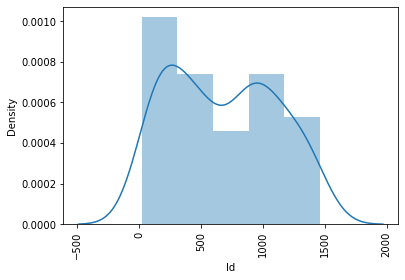

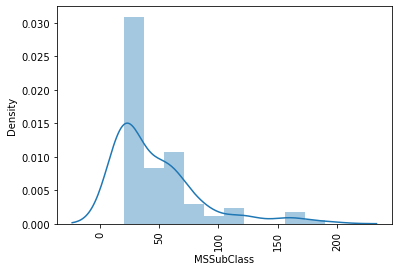

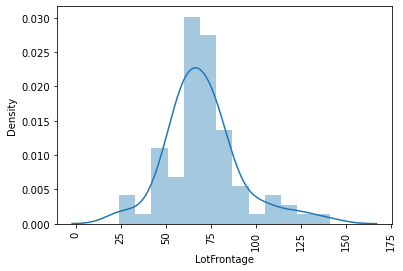

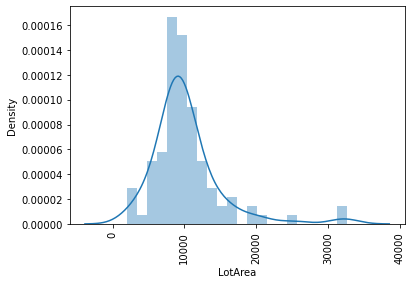

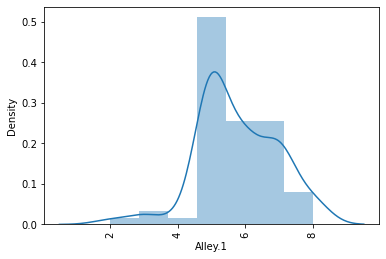

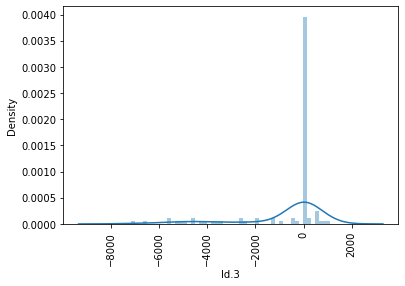

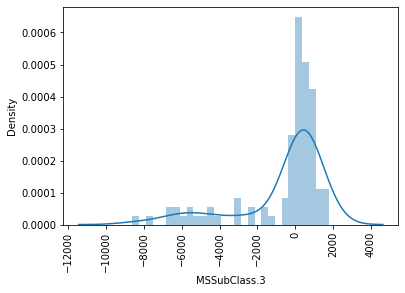

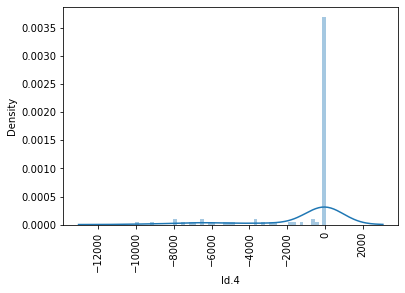

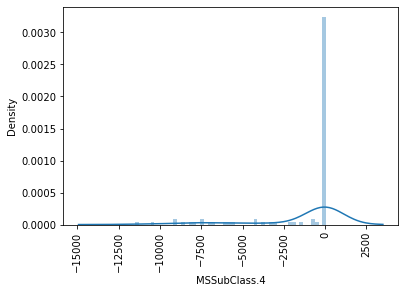

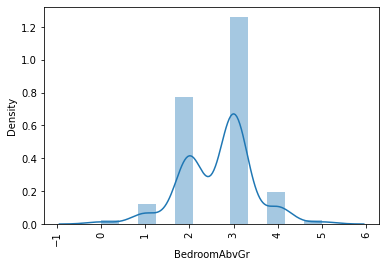

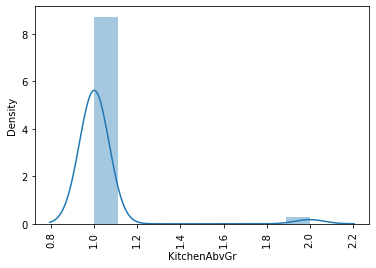

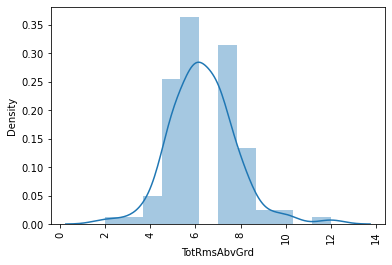

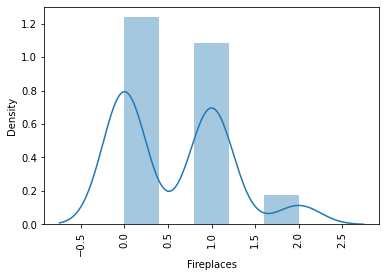

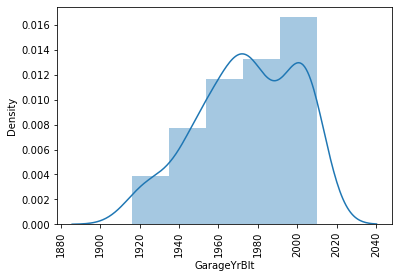

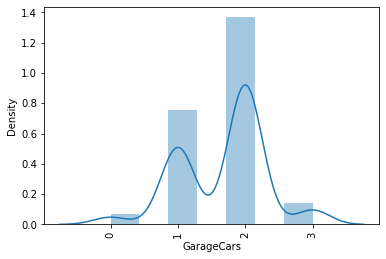

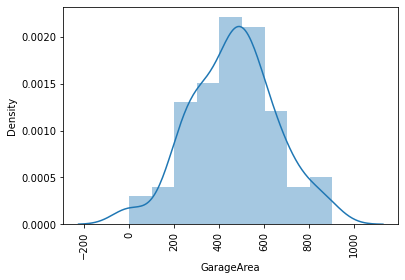

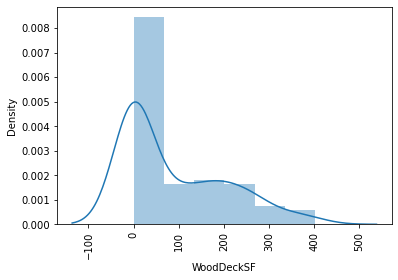

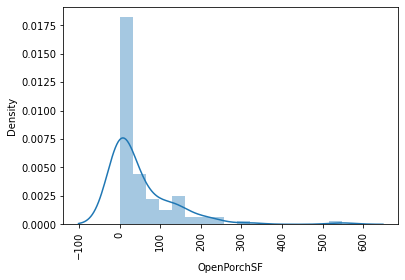

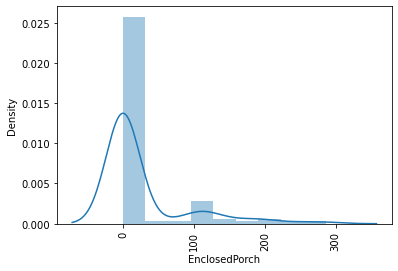

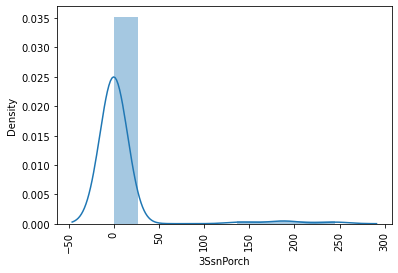

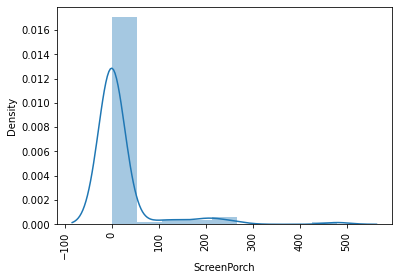

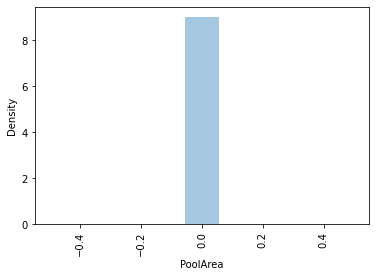

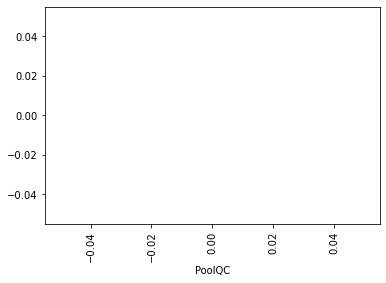

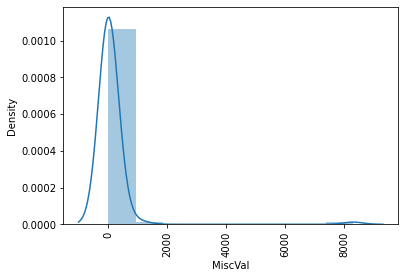

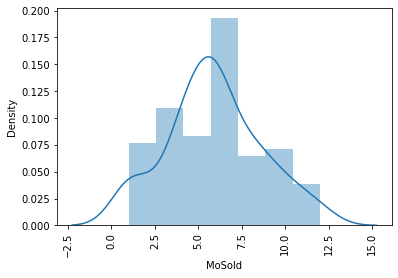

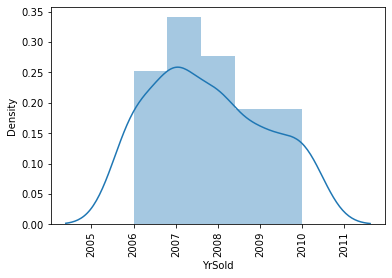

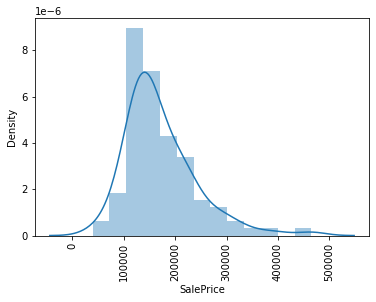

In [104]:
for i in train.describe().columns:
    sns.distplot(train[i])
    plt.xticks(rotation=90)
    plt.show()

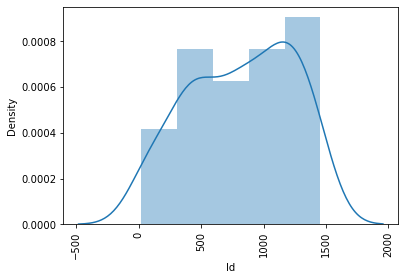

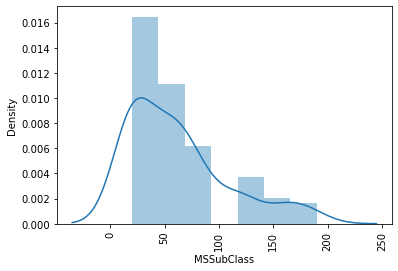

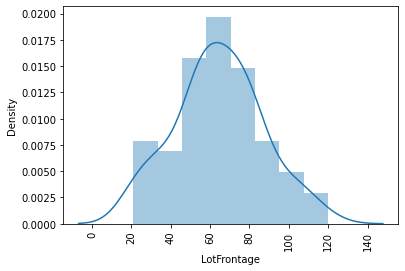

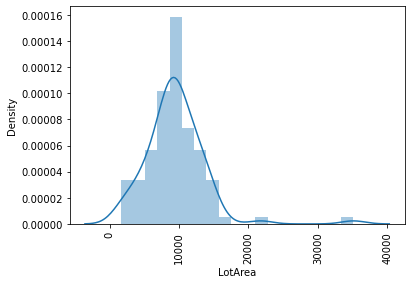

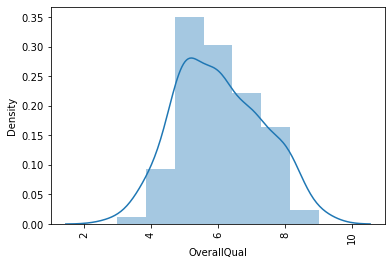

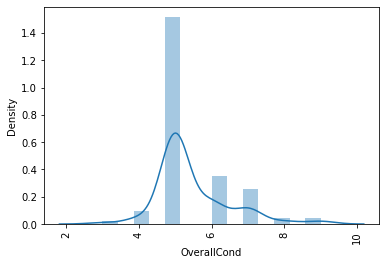

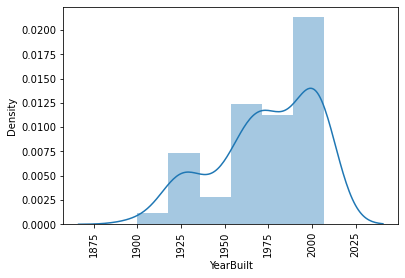

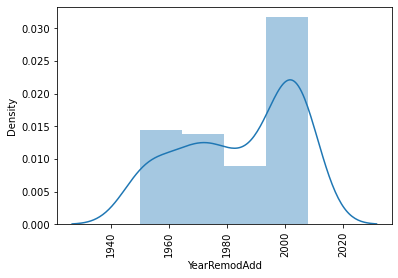

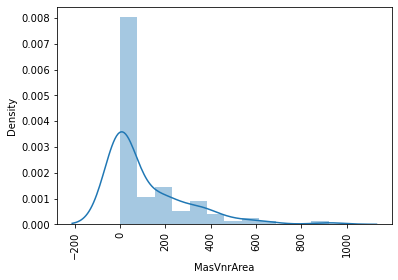

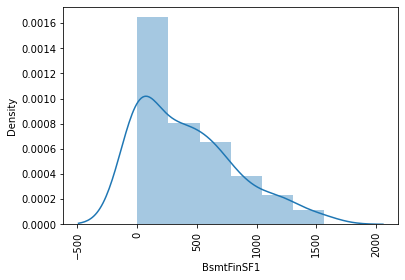

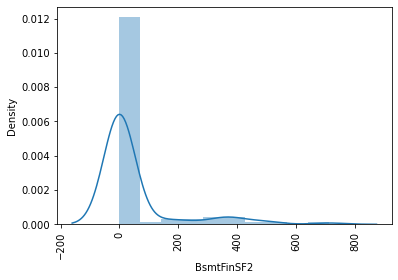

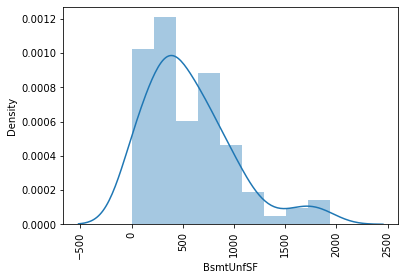

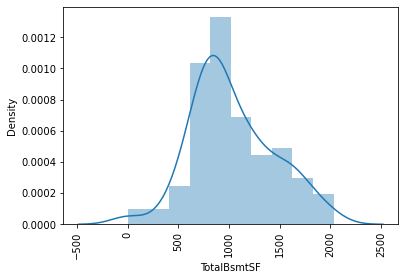

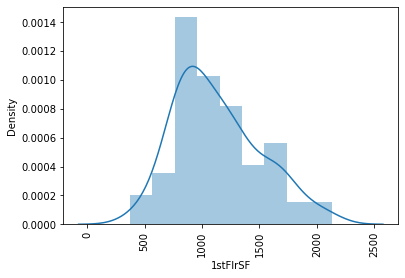

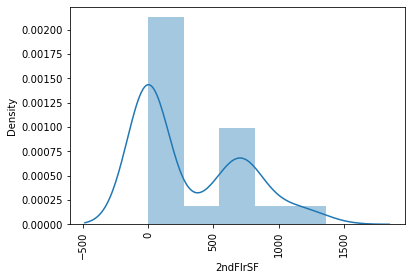

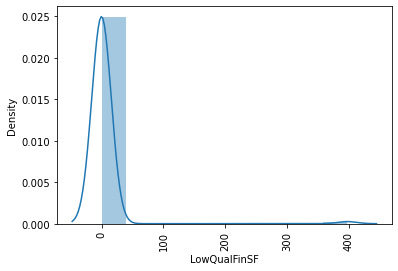

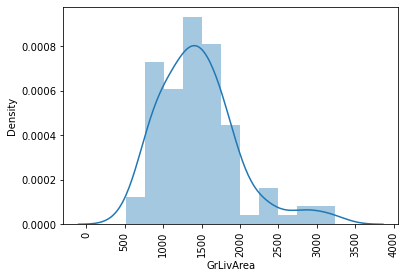

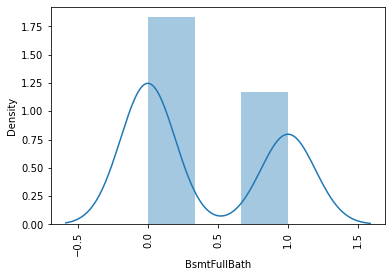

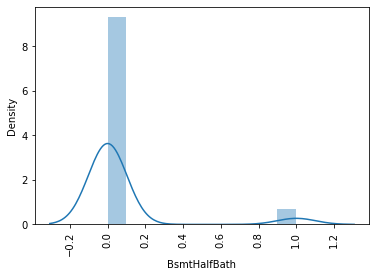

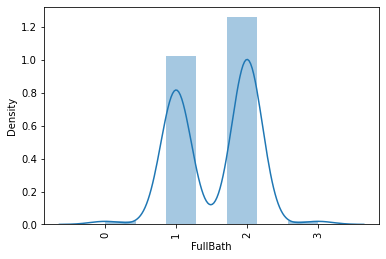

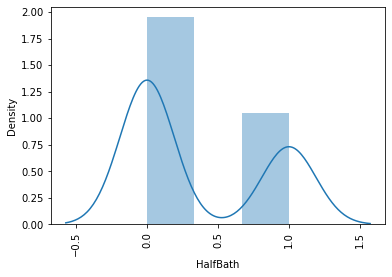

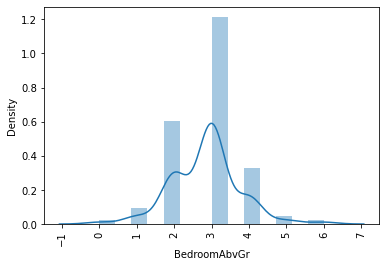

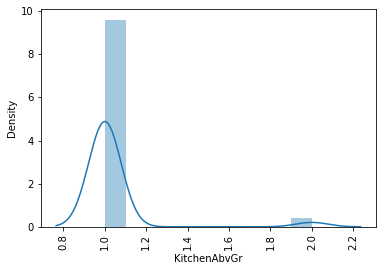

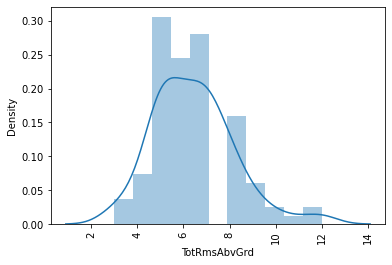

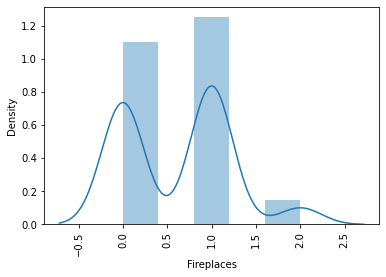

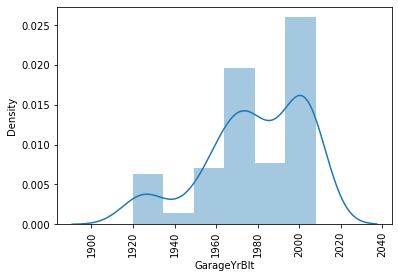

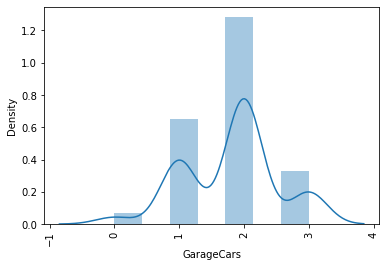

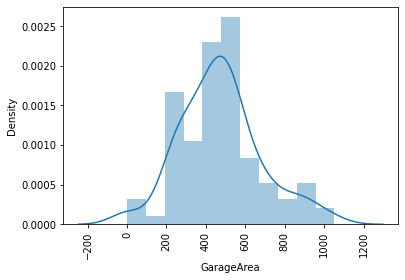

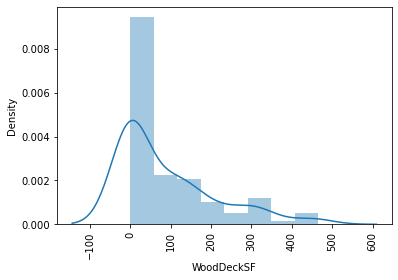

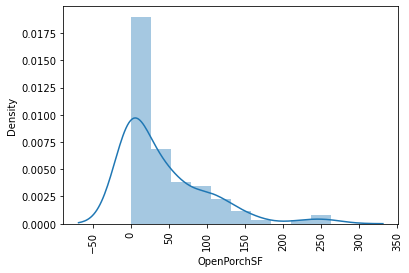

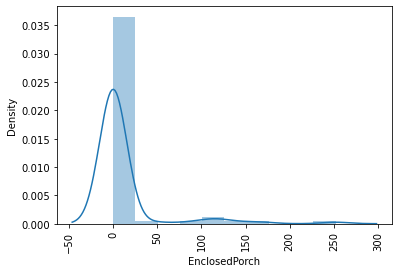

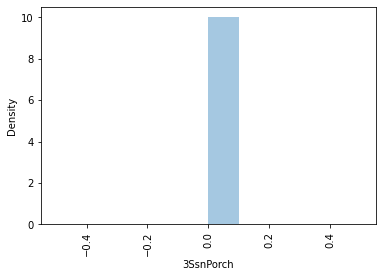

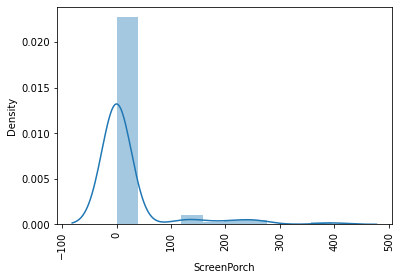

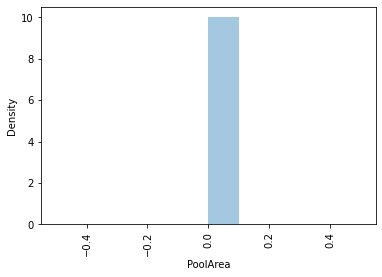

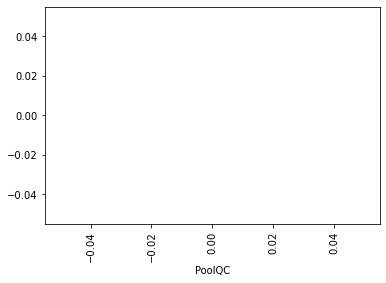

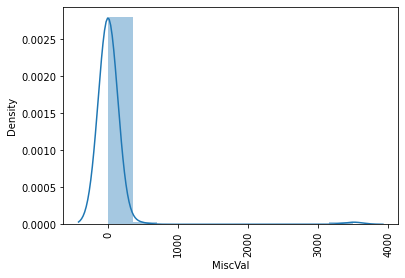

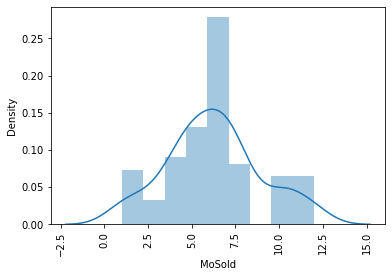

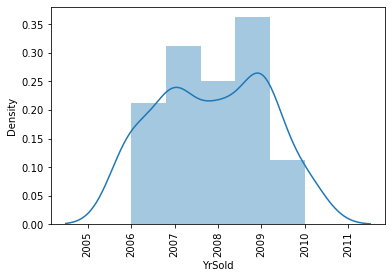

In [105]:
for i in test.describe().columns:
    sns.distplot(test[i])
    plt.xticks(rotation=90)
    plt.show()

In [106]:
train.MSZoning.value_counts()

RL    79
RM    17
RH     2
FV     1
Name: MSZoning, dtype: int64

In [107]:
train.Street.value_counts()

Pave    99
Name: Street, dtype: int64

In [108]:
train.Alley.value_counts()

Grvl    4
Pave    1
Name: Alley, dtype: int64

In [109]:
train.LotShape.value_counts()

Reg    68
IR1    29
IR2     1
IR3     1
Name: LotShape, dtype: int64

In [110]:
train.LandContour.value_counts()

Lvl    88
Bnk     6
Low     3
HLS     2
Name: LandContour, dtype: int64

In [111]:
train.Utilities.value_counts()

AllPub    99
Name: Utilities, dtype: int64

In [112]:
train.Fence.value_counts()

MnPrv    13
GdPrv     6
GdWo      3
MnWw      2
Name: Fence, dtype: int64

In [113]:
train.PoolQC.value_counts()

Series([], Name: PoolQC, dtype: int64)

In [114]:
train.YrSold.value_counts()

2007    27
2008    22
2006    20
2010    15
2009    15
Name: YrSold, dtype: int64

In [115]:
train.SaleCondition.value_counts()

Normal     84
Abnorml     7
Partial     6
Family      1
Alloca      1
Name: SaleCondition, dtype: int64

In [116]:
train.describe()

Id  MSSubClass  LotFrontage       LotArea    Alley.1  \
count    99.000000   99.000000    81.000000     99.000000  73.000000   
mean    677.959596   46.818182    70.641975  10244.636364   5.753425   
std     427.277211   36.396727    20.769153   4897.589010   1.187678   
min      23.000000   20.000000    24.000000   2016.000000   2.000000   
25%     272.500000   20.000000    60.000000   7940.500000   5.000000   
50%     590.000000   30.000000    70.000000   9196.000000   6.000000   
75%    1029.500000   60.000000    80.000000  11314.000000   7.000000   
max    1459.000000  190.000000   141.000000  32668.000000   8.000000   

              Id.3  MSSubClass.3          Id.4  MSSubClass.4  BedroomAbvGr  \
count    99.000000     99.000000     99.000000     99.000000     99.000000   
mean   -803.181818   -644.222222  -1205.727273  -1378.585859      2.646465   
std    1820.862586   2368.987102   2505.260448   2866.022548      0.786534   
min   -7175.000000  -8614.000000 -10053.000000 -11492.000000      0.000000   
25%    -150.000000   -182.000000   -214.000000   -245.500000      2.000000   
50%       0.000000    253.000000      0.000000      1.000000      3.000000   
75%       0.000000    663.000000      0.000000      2.000000      3.000000   
max    1120.000000   1800.000000     71.000000     64.000000      5.000000   

       KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
count     99.000000     99.000000   99.000000    96.000000   99.000000   
mean       1.030303      6.323232    0.575758  1974.489583    1.676768   
std        0.172292      1.455659    0.624188    25.073364    0.636128   
min        1.000000      2.000000    0.000000  1916.000000    0.000000   
25%        1.000000      5.000000    0.000000  1957.000000    1.000000   
50%        1.000000      6.000000    1.000000  1976.500000    2.000000   
75%        1.000000      7.000000    1.000000  2000.250000    2.000000   
max        2.000000     12.000000    2.000000  2010.000000    3.000000   

       GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch   3SsnPorch  \
count   99.000000   99.000000    99.000000      99.000000   99.000000   
mean   465.060606   88.878788    51.949495      25.313131    7.686869   
std    188.038577  113.779080    84.365625      59.789025   38.411214   
min      0.000000    0.000000     0.000000       0.000000    0.000000   
25%    327.500000    0.000000     0.000000       0.000000    0.000000   
50%    470.000000    0.000000     0.000000       0.000000    0.000000   
75%    576.000000  173.000000    79.000000       0.000000    0.000000   
max    905.000000  402.000000   547.000000     286.000000  245.000000   

       ScreenPorch  PoolArea  PoolQC      MiscVal     MoSold       YrSold  \
count     99.00000      99.0     0.0    99.000000  99.000000    99.000000   
mean      20.10101       0.0     NaN   115.656566   5.909091  2007.777778   
std       70.08588       0.0     NaN   844.720895   2.722135     1.344342   
min        0.00000       0.0     NaN     0.000000   1.000000  2006.000000   
25%        0.00000       0.0     NaN     0.000000   4.000000  2007.000000   
50%        0.00000       0.0     NaN     0.000000   6.000000  2008.000000   
75%        0.00000       0.0     NaN     0.000000   8.000000  2009.000000   
max      480.00000       0.0     NaN  8300.000000  12.000000  2010.000000   

           SalePrice  
count      99.000000  
mean   171144.171717  
std     69652.516090  
min     39300.000000  
25%    126750.000000  
50%    153000.000000  
75%    202950.000000  
max    465000.000000

In [117]:
train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    127         120       RL          NaN     4928   Pave   NaN      IR1   
1    889          20       RL         95.0    15865   Pave   NaN      IR1   
2    793          60       RL         92.0     9920   Pave   NaN      IR1   
3    110          20       RL        105.0    11751   Pave   NaN      IR1   
4    422          20       RL          NaN    16635   Pave   NaN      IR1   
5   1197          60       RL         58.0    14054   Pave   NaN      IR1   
6    561          20       RL          NaN    11341   Pave   NaN      IR1   
7   1041          20       RL         88.0    13125   Pave   NaN      Reg   
8    503          20       RL         70.0     9170   Pave   NaN      Reg   
9    576          50       RL         80.0     8480   Pave   NaN      Reg   
10   449          50       RM         50.0     8600   Pave   NaN      Reg   
11   833          60       RL         44.0     9548   Pave   NaN      IR1   
12   277          20       RL        129.0     9196   Pave   NaN      IR1   
13    84          20       RL         80.0     8892   Pave   NaN      IR1   
14   888          50       RL         59.0    16466   Pave   NaN      IR1   
15  1013          70       RL         55.0    10592   Pave   NaN      Reg   
16  1154          30       RM          NaN     5890   Pave   NaN      Reg   
17   728          20       RL         64.0     7314   Pave   NaN      Reg   
18   270          20       RL          NaN     7917   Pave   NaN      IR1   
19  1105         160       RM         24.0     2016   Pave   NaN      Reg   
20   259          60       RL         80.0    12435   Pave   NaN      Reg   
21  1407          85       RL         70.0     8445   Pave   NaN      Reg   
22  1459          20       RL         68.0     9717   Pave   NaN      Reg   
23   997          20       RL          NaN    10659   Pave   NaN      IR1   
24  1094          20       RL         71.0     9230   Pave   NaN      Reg   
25   114          20       RL          NaN    21000   Pave   NaN      Reg   
26  1384          30       RL          NaN    25339   Pave   NaN      Reg   
27   379          20       RL         88.0    11394   Pave   NaN      Reg   
28   556          45       RM         58.0     6380   Pave   NaN      Reg   
29   464          70       RL         74.0    11988   Pave   NaN      IR1   
30    46         120       RL         61.0     7658   Pave   NaN      Reg   
31   426          60       RM         60.0     3378   Pave  Grvl      Reg   
32  1231          90       RL          NaN    18890   Pave   NaN      IR1   
33   171          50       RM          NaN    12358   Pave   NaN      IR1   
34   869          60       RL          NaN    14762   Pave   NaN      IR2   
35   151          20       RL        120.0    10356   Pave   NaN      Reg   
36   859          20       RL         80.0    10400   Pave   NaN      Reg   
37   176          20       RL         84.0    12615   Pave   NaN      Reg   
38   361          85       RL          NaN     7540   Pave   NaN      IR1   
39   590          40       RM         50.0     9100   Pave   NaN      Reg   
40   172          20       RL        141.0    31770   Pave   NaN      IR1   
41   527          20       RL         70.0    13300   Pave   NaN      Reg   
42  1365         160       FV         30.0     3180   Pave  Pave      Reg   
43   146         160       RM         24.0     2522   Pave   NaN      Reg   
44  1006          80       RL         65.0     8385   Pave   NaN      Reg   
45   275          20       RL         76.0     8314   Pave   NaN      Reg   
46   380          60       RL         60.0     8123   Pave   NaN      IR1   
47  1309          20       RM        100.0    12000   Pave   NaN      Reg   
48   534          20       RL         50.0     5000   Pave   NaN      Reg   
49   494          20       RL         70.0     7931   Pave   NaN      Reg   
50   701          20       RL         85.0    14331   Pave   NaN      Reg   
51

In [118]:
test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    337          20       RL         86.0    14157   Pave   NaN      IR1   
1   1018         120       RL          NaN     5814   Pave   NaN      IR1   
2    929          20       RL          NaN    11838   Pave   NaN      Reg   
3   1148          70       RL         75.0    12000   Pave   NaN      Reg   
4   1227          60       RL         86.0    14598   Pave   NaN      IR1   
5    650         180       RM         21.0     1936   Pave   NaN      Reg   
6   1453         180       RM         35.0     3675   Pave   NaN      Reg   
7    152          20       RL        107.0    13891   Pave   NaN      Reg   
8    427          80       RL          NaN    12800   Pave   NaN      Reg   
9    776         120       RM         32.0     4500   Pave   NaN      Reg   
10    30          30       RM         60.0     6324   Pave   NaN      IR1   
11  1425          20       RL          NaN     9503   Pave   NaN      Reg   
12   423          20       RL        100.0    21750   Pave   NaN      Reg   
13  1185          20       RL         50.0    35133   Grvl   NaN      Reg   
14   775          20       RL        110.0    14226   Pave   NaN      Reg   
15   391          50       RL         50.0     8405   Pave  Grvl      Reg   
16  1408          20       RL          NaN     8780   Pave   NaN      IR1   
17   513          20       RL         70.0     9100   Pave   NaN      Reg   
18  1266         160       FV         35.0     3735   Pave   NaN      Reg   
19   173         160       RL         44.0     5306   Pave   NaN      IR1   
20  1150          70       RM         50.0     9000   Pave   NaN      Reg   
21   797          20       RL         71.0     8197   Pave   NaN      Reg   
22   137          20       RL          NaN    10355   Pave   NaN      IR1   
23   706         190       RM         70.0     5600   Pave   NaN      Reg   
24  1377          30       RL         52.0     6292   Pave   NaN      Reg   
25  1177          20       RL         37.0     6951   Pave   NaN      IR1   
26  1456          60       RL         62.0     7917   Pave   NaN      Reg   
27   369          20       RL         78.0     7800   Pave   NaN      Reg   
28  1421          60       RL         90.0    11700   Pave   NaN      Reg   
29   999          30       RM         60.0     9786   Pave   NaN      Reg   
30  1217          90       RM         68.0     8930   Pave   NaN      Reg   
31   937          20       RL         67.0    10083   Pave   NaN      Reg   
32   769          20       RL         70.0     9100   Pave   NaN      Reg   
33   831          20       RL         80.0    11900   Pave   NaN      IR1   
34   678          30       RL         52.0     9022   Pave   NaN      Reg   
35   574          80       RL         76.0     9967   Pave   NaN      IR1   
36   921          60       RL         70.0     8462   Pave   NaN      IR1   
37  1292         160       RM         21.0     1680   Pave   NaN      Reg   
38  1277          60       RL          NaN    12936   Pave   NaN      IR1   
39   676         160       RL         24.0     2289   Pave   NaN      Reg   
40   108          20       RM         50.0     6000   Pave   NaN      Reg   
41   424          60       RL         80.0     9200   Pave   NaN      Reg   
42   823          60       RL          NaN    12394   Pave   NaN      IR1   
43  1455          20       FV         62.0     7500   Pave  Pave      Reg   
44   377          85       RL         57.0     8846   Pave   NaN      IR1   
45  1256          50       RM         52.0     6240   Pave   NaN      Reg   
46  1120          20       RL         70.0     7560   Pave   NaN      Reg   
47   265          30       RM         30.0     5232   Pave  Grvl      IR3   
48  1158         120       RL         34.0     5001   Pave   NaN      IR1   
49   725          20       RL         86.0    13286   Pave   NaN      IR1   
50  1378          50       RL         60.0    10998   Pave  Grvl      Reg   
51

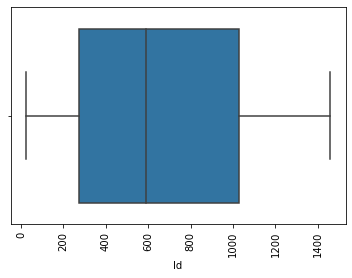

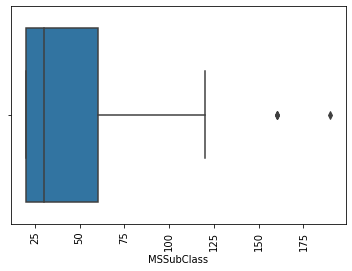

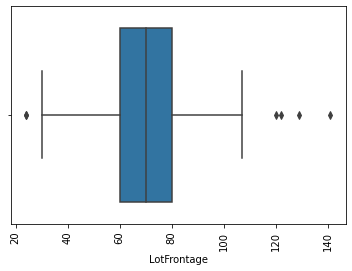

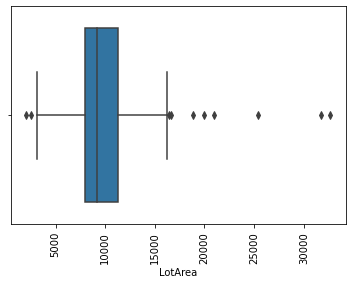

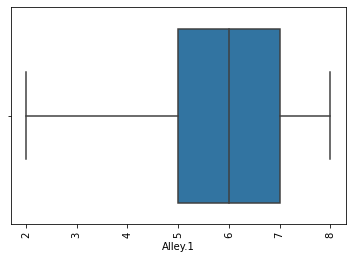

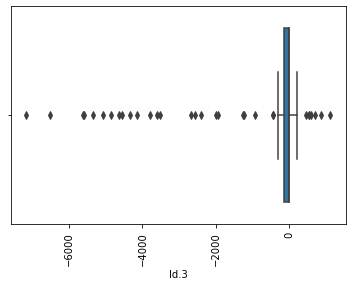

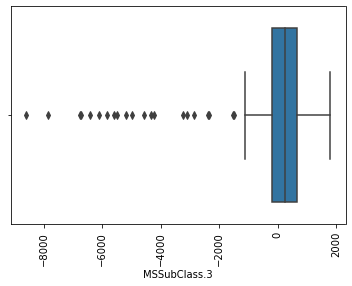

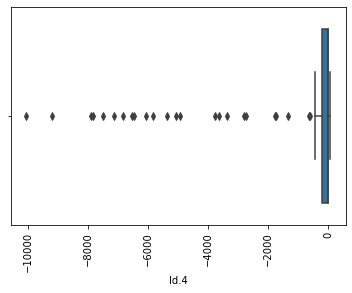

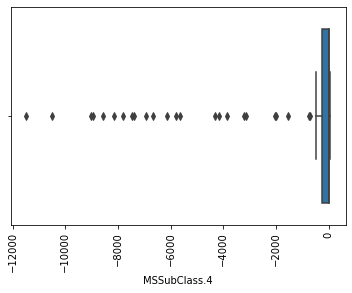

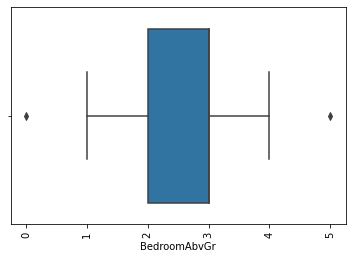

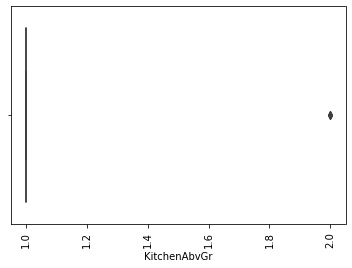

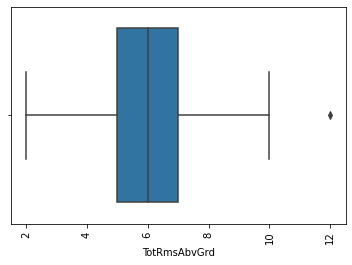

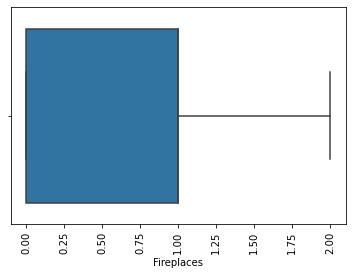

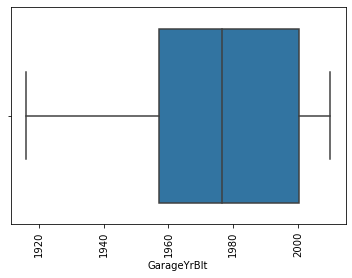

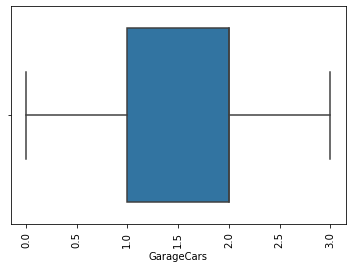

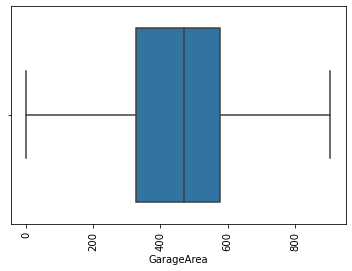

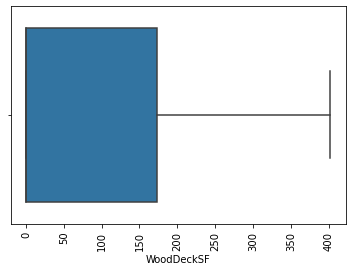

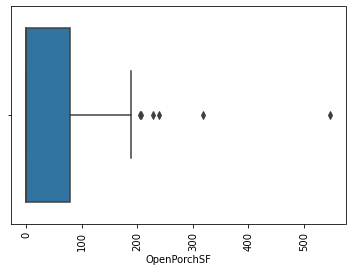

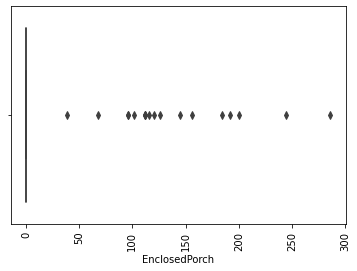

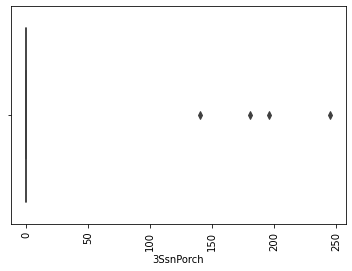

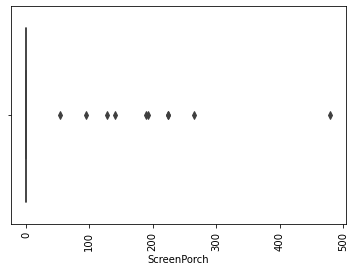

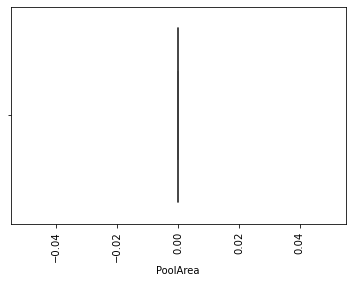

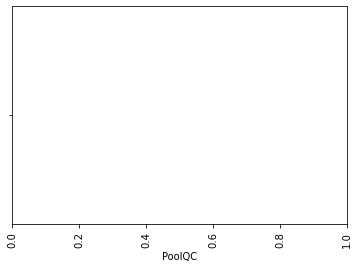

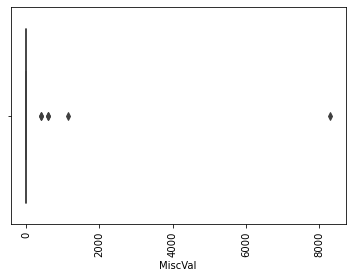

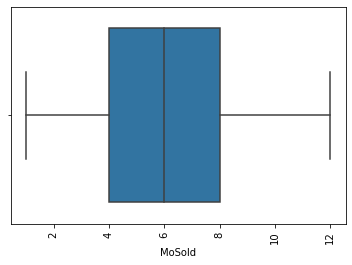

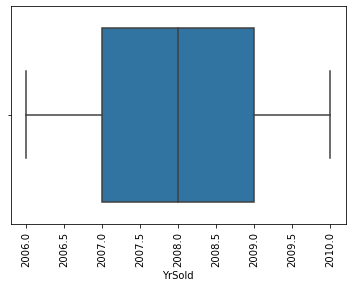

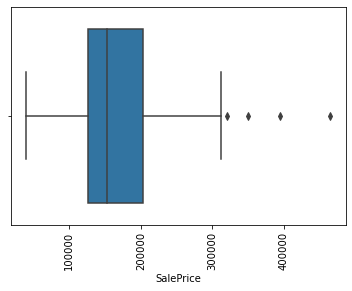

In [119]:
for i in train.describe().columns:
    # Train[i].plot.box()
    sns.boxplot(train[i])
    plt.xticks(rotation=90)
    plt.show()

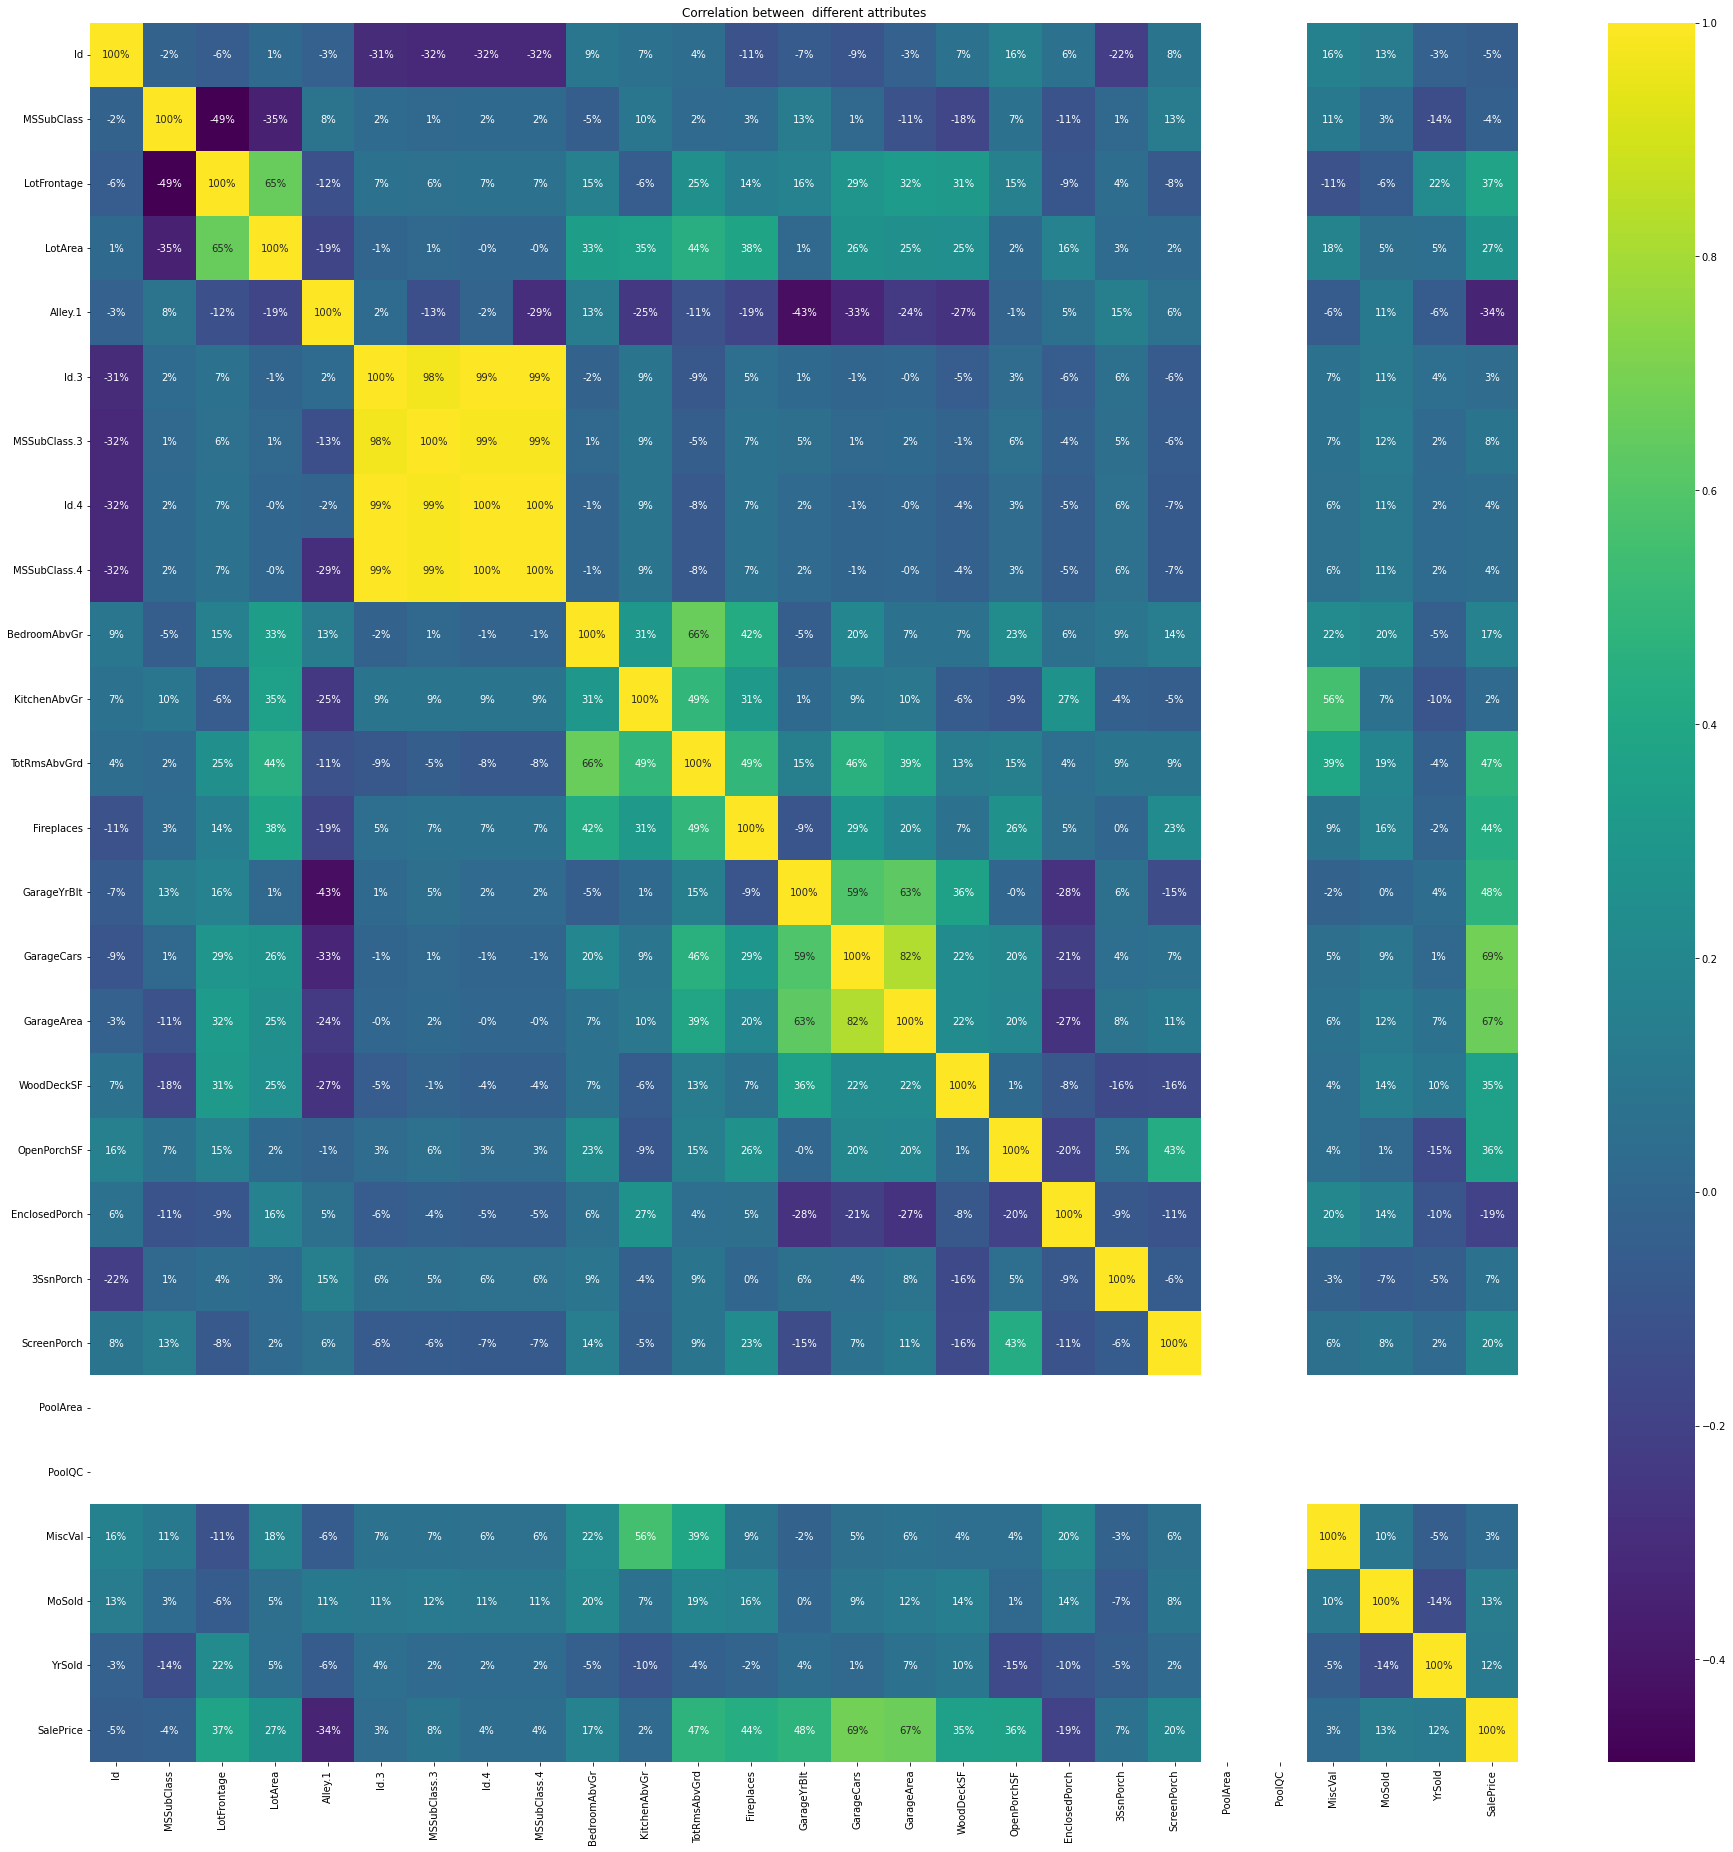

In [120]:
plt.figure(figsize=(32,32))
sns.heatmap(train.corr(),annot=True,fmt='.0%',cmap='viridis')
plt.title('Correlation between  different attributes')

plt.show()

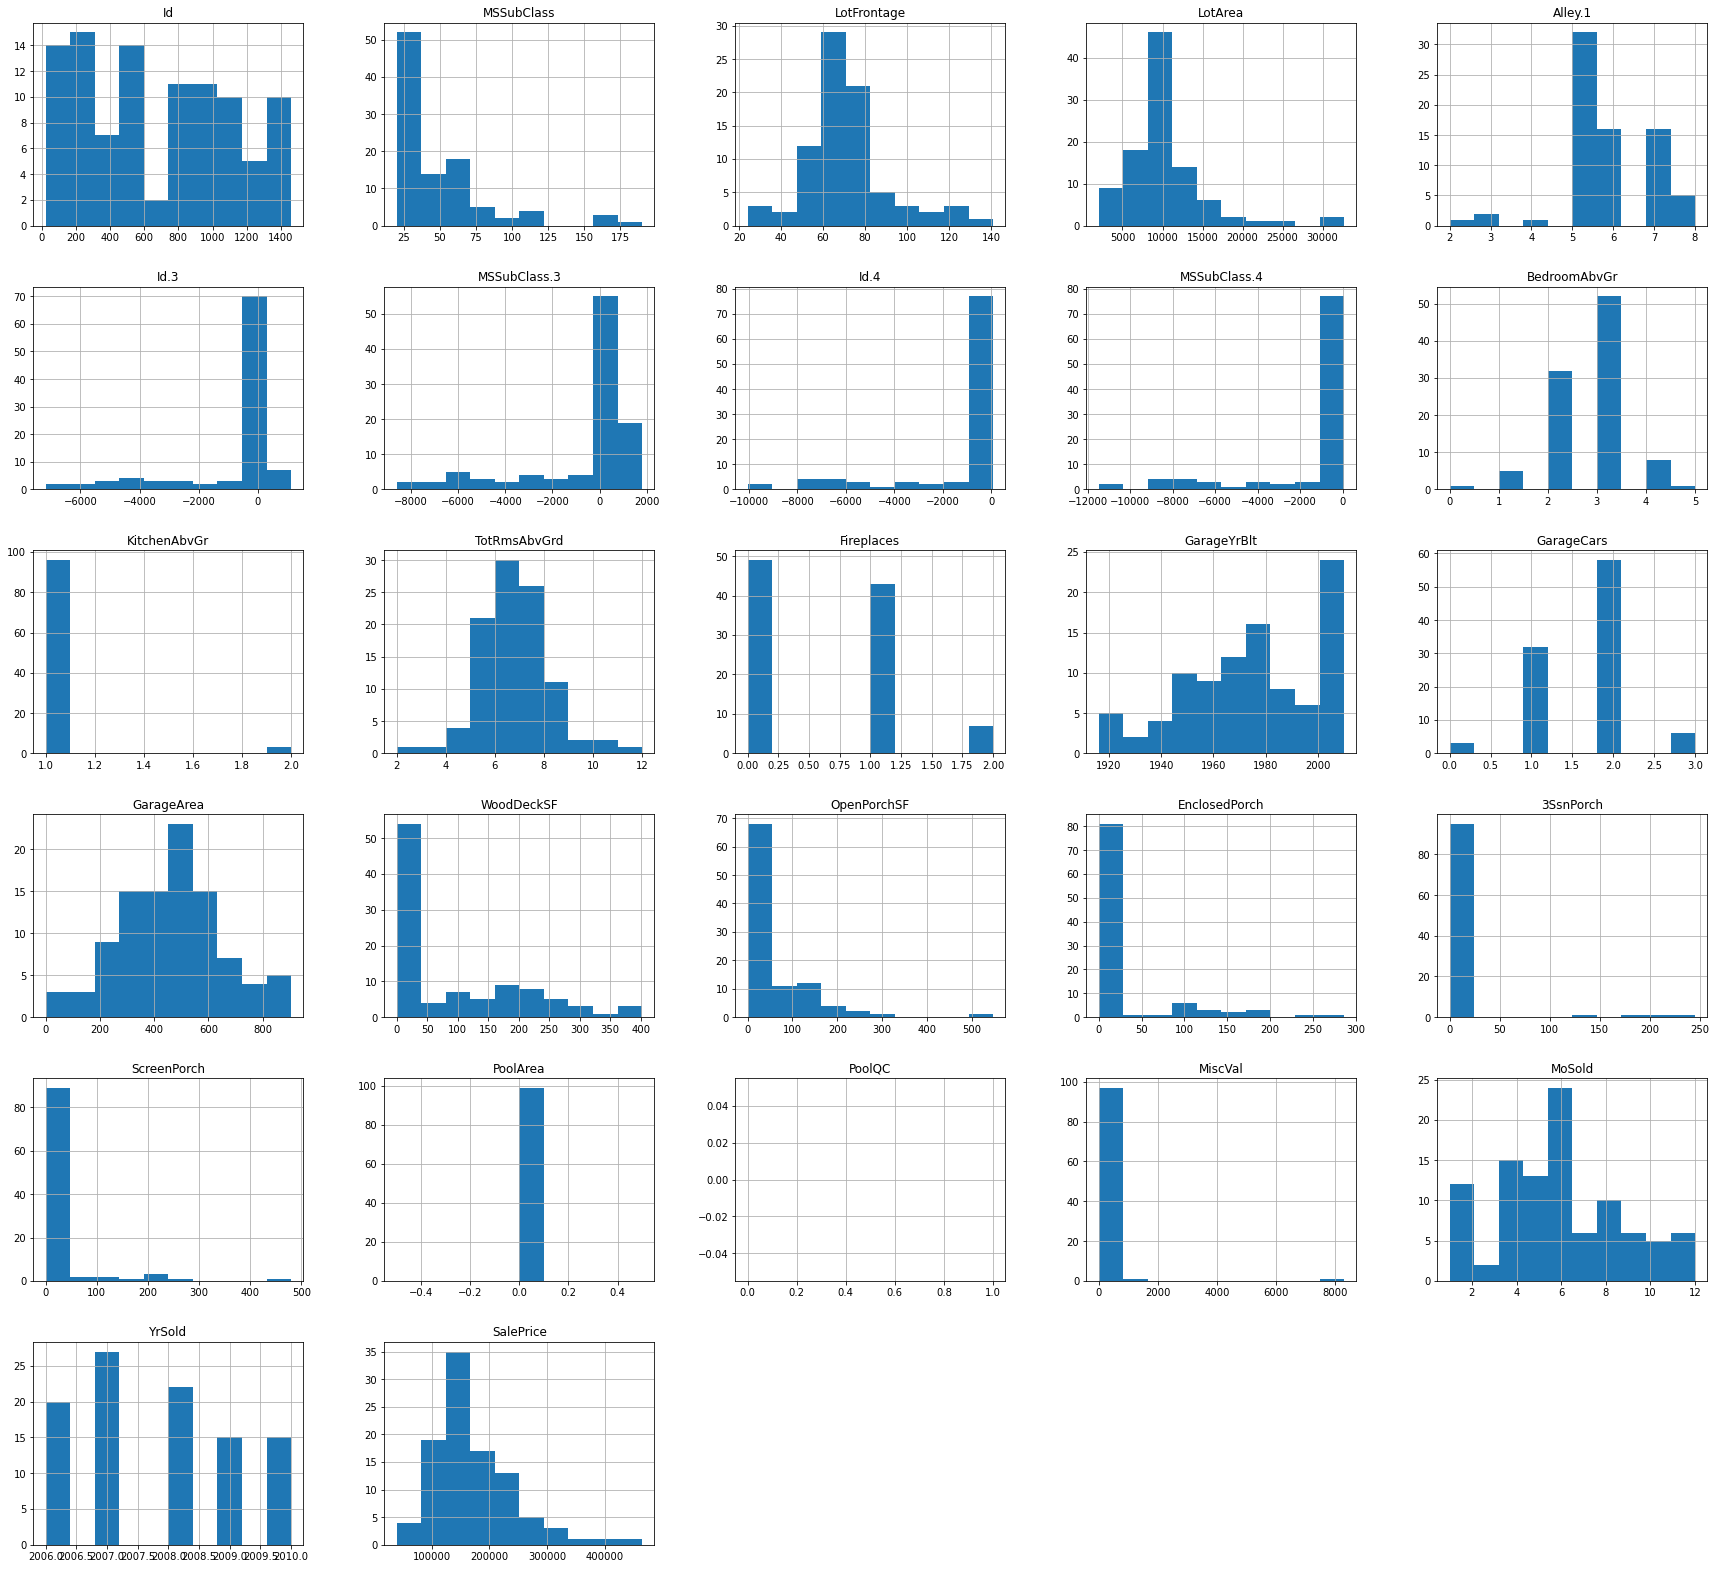

In [121]:
train.hist(figsize=(30,28));

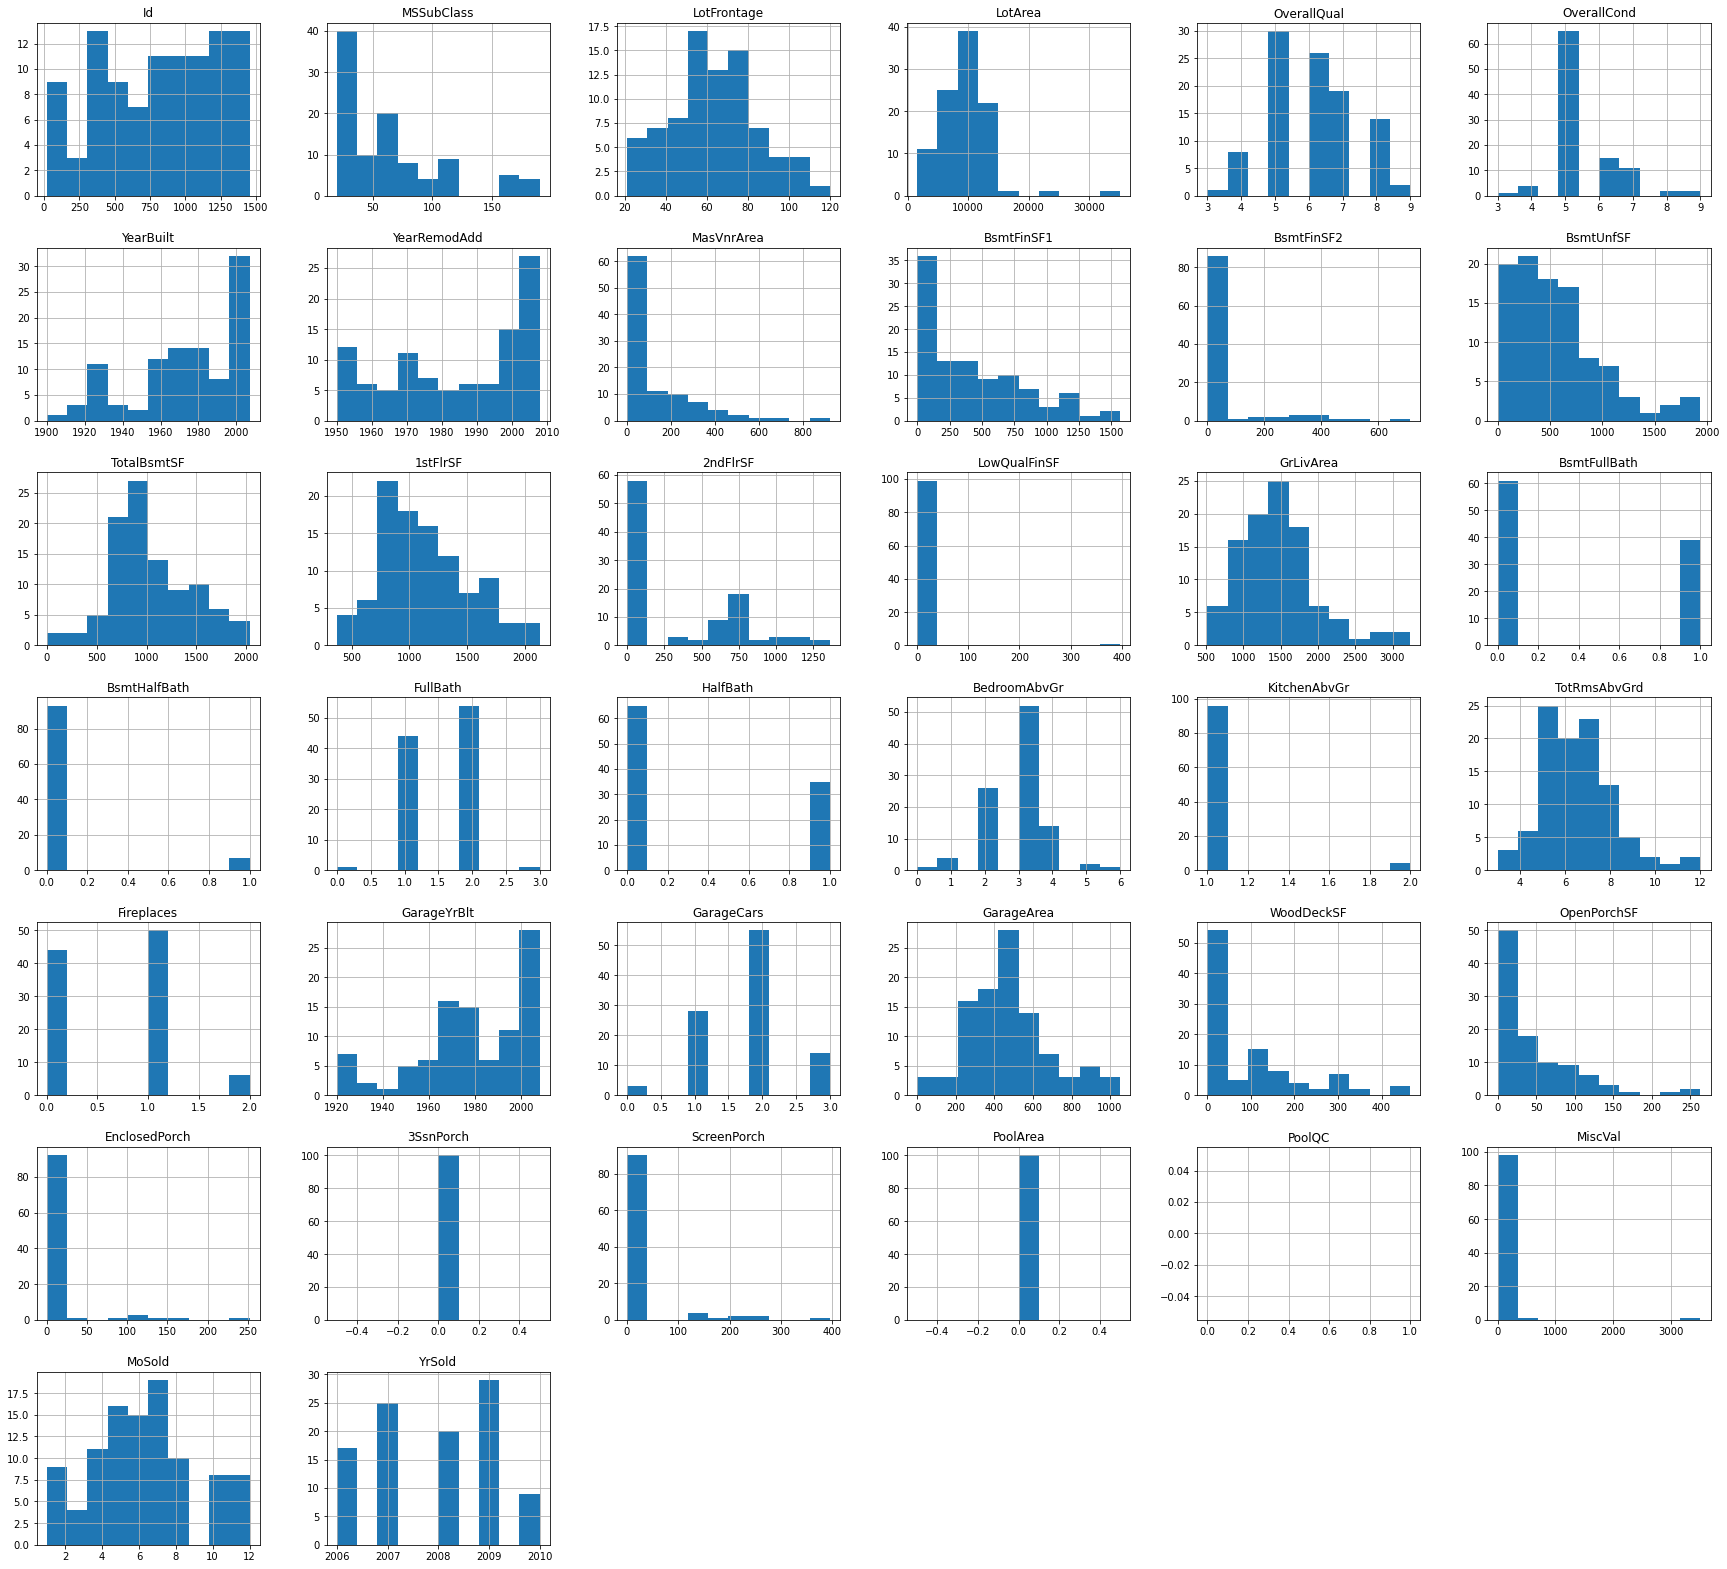

In [122]:
test.hist(figsize=(30,28));

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(1, 0, 'Id'),
  Text(2, 0, 'MSSubClass'),
  Text(3, 0, 'LotFrontage'),
  Text(4, 0, 'LotArea'),
  Text(5, 0, 'Alley.1'),
  Text(6, 0, 'Id.3'),
  Text(7, 0, 'MSSubClass.3'),
  Text(8, 0, 'Id.4'),
  Text(9, 0, 'MSSubClass.4'),
  Text(10, 0, 'BedroomAbvGr'),
  Text(11, 0, 'KitchenAbvGr'),
  Text(12, 0, 'TotRmsAbvGrd'),
  Text(13, 0, 'Fireplaces'),
  Text(14, 0, 'GarageYrBlt'),
  Text(15, 0, 'GarageCars'),
  Text(16, 0, 'GarageArea'),
  Text(17, 0, 'WoodDeckSF'),
  Text(18, 0, 'OpenPorchSF'),
  Text(19, 0, 'EnclosedPorch'),
  Text(20, 0, '3SsnPorch'),
  Text(21, 0, 'ScreenPorch'),
  Text(22, 0, 'PoolArea'),
  Text(23, 0, 'PoolQC'),
  Text(24, 0, 'MiscVal'),
  Text(25, 0, 'MoSold'),
  Text(26, 0, 'YrSold'),
  Text(27, 0, 'SalePrice')])

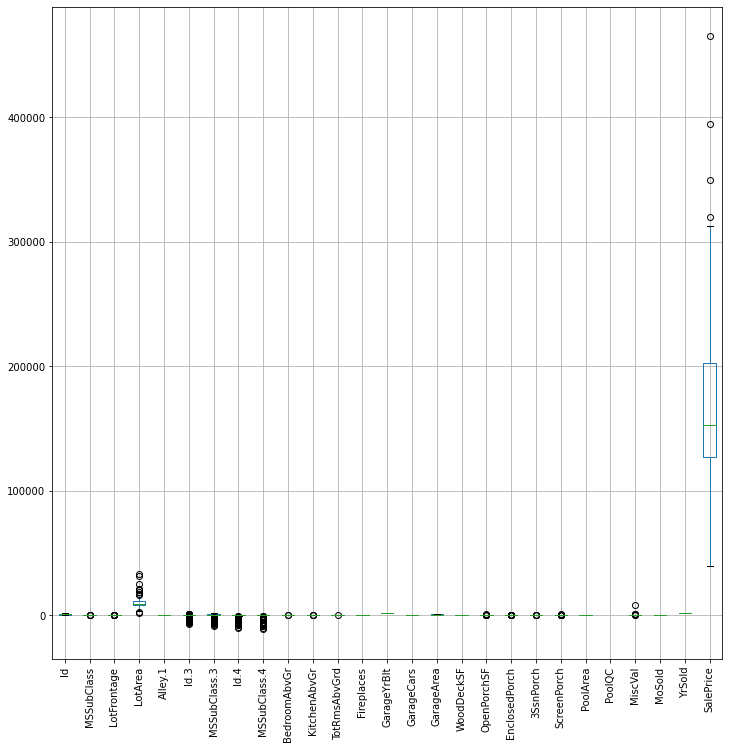

In [123]:
train.boxplot(figsize=(12,12));
plt.xticks(rotation=90)

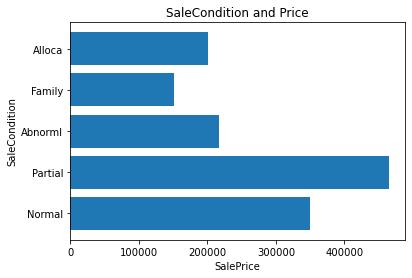

In [124]:
plt.barh(train['SaleCondition'],train['SalePrice'])
plt.title('SaleCondition and Price')
plt.xlabel('SalePrice')
plt.ylabel('SaleCondition')
plt.show()

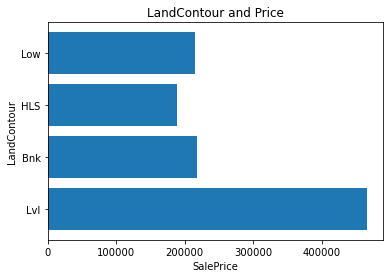

In [125]:
plt.barh(train['LandContour'],train['SalePrice'])
plt.title('LandContour and Price')
plt.xlabel('SalePrice')
plt.ylabel('LandContour')
plt.show()

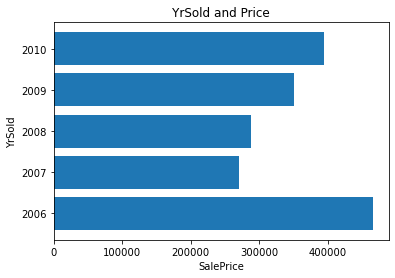

In [126]:
plt.barh(train['YrSold'],train['SalePrice'])
plt.title('YrSold and Price')
plt.xlabel('SalePrice')
plt.ylabel('YrSold')
plt.show()

(array([0]), [Text(0, 0, 'Pave')])

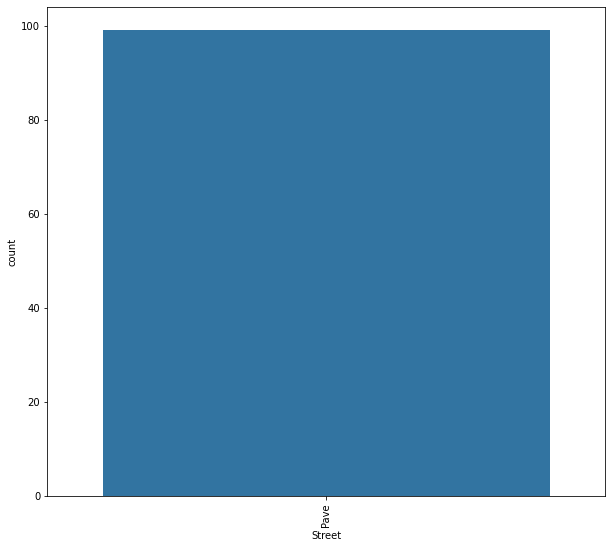

In [127]:
plt.figure(figsize=(10,9))
sns.countplot(train.Street)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'RL'), Text(1, 0, 'RM'), Text(2, 0, 'FV'), Text(3, 0, 'RH')])

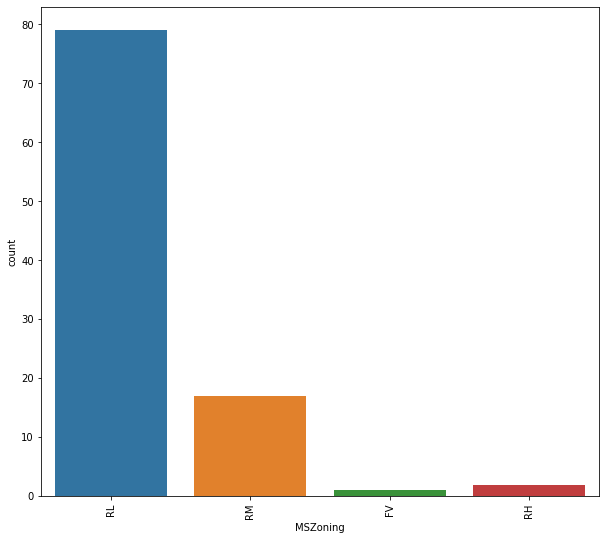

In [128]:
plt.figure(figsize=(10,9))
sns.countplot(train.MSZoning)
plt.xticks(rotation=90)

<AxesSubplot:title={'center':'SalePrice and LotArea'}, xlabel='SalePrice', ylabel='LotArea'>

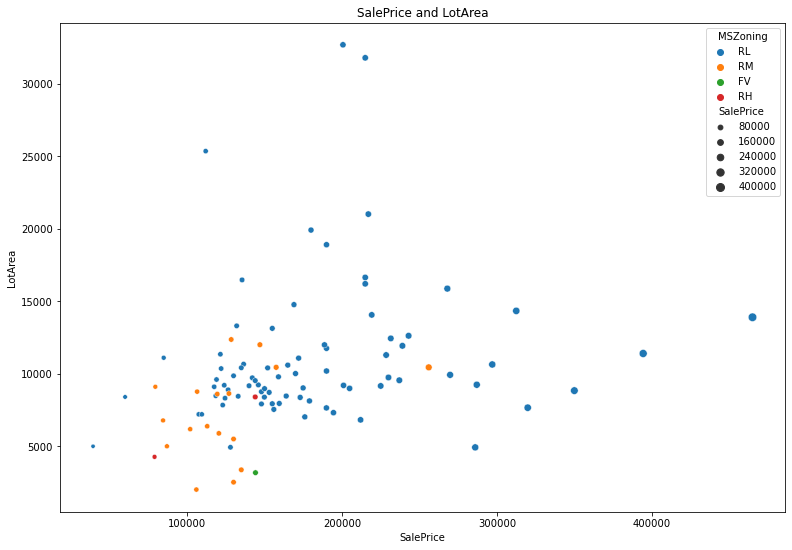

In [129]:
plt.figure(figsize=(13,9))
plt.xlabel('SalePrice')
plt.ylabel('LotArea')
plt.title('SalePrice and LotArea')
sns.scatterplot(x='SalePrice',y='LotArea',hue='MSZoning',size='SalePrice',data=train)

Text(0.5, 1.0, 'House Price vs YearSold')

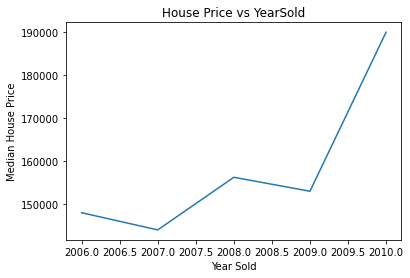

In [130]:
train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

In [131]:
#Factor plot of OverallQual vs SalePrice
sns.factorplot(x="OverallQual",y="SalePrice",data=train,kind="bar",size = 4,palette = "muted",aspect=3)
plt.title('Price of the house according to rating of ther material and finishing',fontsize=25)
plt.ylabel("Sale Price of the house")
plt.xticks(rotation=90)
plt.show()

ValueError: Could not interpret input 'OverallQual'

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(train['OverallQual'],palette= 'rainbow')
plt.title("Rating of the overall material and finish of the house",fontsize=20)
plt.xticks(rotation=90)
plt.show()

print(train.OverallQual.value_counts())

In [ ]:
#Checking the correlation with target variable that is SalePrice
plt.figure(figsize=(18,8))
train.drop('SalePrice', axis=1).corrwith(train['SalePrice']).plot(kind='bar',grid=True )
plt.xticks(rotation=90)
plt.title("Correlation with target Variable",fontsize=25)
plt.show()

In [132]:
df=pd.concat([train,test],ignore_index=True)
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
5    1197          60       RL         58.0    14054   Pave   NaN      IR1   
6     561          20       RL          NaN    11341   Pave   NaN      IR1   
7    1041          20       RL         88.0    13125   Pave   NaN      Reg   
8     503          20       RL         70.0     9170   Pave   NaN      Reg   
9     576          50       RL         80.0     8480   Pave   NaN      Reg   
10    449          50       RM         50.0     8600   Pave   NaN      Reg   
11    833          60       RL         44.0     9548   Pave   NaN      IR1   
12    277          20       RL        129.0     9196   Pave   NaN      IR1   
13     84          20       RL         80.0     8892   Pave   NaN      IR1   
14    888          50       RL         59.0    16466   Pave   NaN      IR1   
15   1013          70       RL         55.0    10592   Pave   NaN      Reg   
16   1154          30       RM          NaN     5890   Pave   NaN      Reg   
17    728          20       RL         64.0     7314   Pave   NaN      Reg   
18    270          20       RL          NaN     7917   Pave   NaN      IR1   
19   1105         160       RM         24.0     2016   Pave   NaN      Reg   
20    259          60       RL         80.0    12435   Pave   NaN      Reg   
21   1407          85       RL         70.0     8445   Pave   NaN      Reg   
22   1459          20       RL         68.0     9717   Pave   NaN      Reg   
23    997          20       RL          NaN    10659   Pave   NaN      IR1   
24   1094          20       RL         71.0     9230   Pave   NaN      Reg   
25    114          20       RL          NaN    21000   Pave   NaN      Reg   
26   1384          30       RL          NaN    25339   Pave   NaN      Reg   
27    379          20       RL         88.0    11394   Pave   NaN      Reg   
28    556          45       RM         58.0     6380   Pave   NaN      Reg   
29    464          70       RL         74.0    11988   Pave   NaN      IR1   
30     46         120       RL         61.0     7658   Pave   NaN      Reg   
31    426          60       RM         60.0     3378   Pave  Grvl      Reg   
32   1231          90       RL          NaN    18890   Pave   NaN      IR1   
33    171          50       RM          NaN    12358   Pave   NaN      IR1   
34    869          60       RL          NaN    14762   Pave   NaN      IR2   
35    151          20       RL        120.0    10356   Pave   NaN      Reg   
36    859          20       RL         80.0    10400   Pave   NaN      Reg   
37    176          20       RL         84.0    12615   Pave   NaN      Reg   
38    361          85       RL          NaN     7540   Pave   NaN      IR1   
39    590          40       RM         50.0     9100   Pave   NaN      Reg   
40    172          20       RL        141.0    31770   Pave   NaN      IR1   
41    527          20       RL         70.0    13300   Pave   NaN      Reg   
42   1365         160       FV         30.0     3180   Pave  Pave      Reg   
43    146         160       RM         24.0     2522   Pave   NaN      Reg   
44   1006          80       RL         65.0     8385   Pave   NaN      Reg   
45    275          20       RL         76.0     8314   Pave   NaN      Reg   
46    380          60       RL         60.0     8123   Pave   NaN      IR1   
47   1309          20       RM        100.0    12000   Pave   NaN      Reg   
48    534          20       RL         50.0     5000   Pave   NaN      Reg   
49    494          20       RL         70.0     7931   Pave   NaN      Reg   
50    701          20       R

In [133]:
#Seeing the NaN values in ratio
print('\nPercentage of missing values in each column:')
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False).head(20)


Percentage of missing values in each column:


PoolQC           1.000000
MiscFeature      0.959799
Alley            0.944724
Fence            0.819095
Alley.2          0.663317
Alley.3          0.633166
Alley.1          0.633166
LotFrontage.1    0.537688
LotFrontage.3    0.537688
LotFrontage.2    0.537688
LandSlope.2      0.532663
Utilities.2      0.532663
LotShape.2       0.532663
LandContour.2    0.532663
MSSubClass.2     0.512563
MSZoning.2       0.512563
BsmtFinType1     0.507538
BsmtFinType2     0.507538
BsmtQual         0.507538
BsmtExposure     0.507538
dtype: float64

In [138]:
#df = df.drop('PoolQC', axis=1)
df = df.drop('MiscFeature', axis=1)
df = df.drop('Alley', axis=1)
df = df.drop('Fence',axis=1)
df = df.drop('FireplaceQu',axis=1)



KeyError: "['MiscFeature'] not found in axis"

In [139]:
df.shape

(199, 115)

In [140]:
#Number of missing values and their percentage in each row
print(pd.DataFrame.from_dict({'Rows' : df.isnull().any(axis = 1), 
                              'missing values' : df.isnull().sum(axis = 1), 
                              'Percentage of missing values' : round(100*df.isnull().sum(axis = 1)/df.shape[1])})
     )

     Rows  missing values  Percentage of missing values
0    True              46                          40.0
1    True              42                          37.0
2    True              42                          37.0
3    True              42                          37.0
4    True              46                          40.0
5    True              42                          37.0
6    True              46                          40.0
7    True              42                          37.0
8    True              42                          37.0
9    True              42                          37.0
10   True              42                          37.0
11   True              42                          37.0
12   True              42                          37.0
13   True              42                          37.0
14   True              42                          37.0
15   True              42                          37.0
16   True              46                       

In [141]:
#Number and percentage of rows having more than 1 missing values
# count the number of rows having > 1 missing values
print("Number of rows having more than 5 missing values : ", len(df[df.isnull().sum(axis=1) > 1].index))
print("Number of rows having more than 5 missing values : ", 100*(len(df[df.isnull().sum(axis=1) > 1].index) / len(df.index)))

Number of rows having more than 5 missing values :  199
Number of rows having more than 5 missing values :  100.0


In [142]:
#Number and percentage of rows having more than 1 missing values
# count the number of rows having > 1 missing values
print("Number of rows having more than 5 missing values : ", len(df[df.isnull().sum(axis=1) > 1].index))
print("Number of rows having more than 5 missing values : ", 100*(len(df[df.isnull().sum(axis=1) > 1].index) / len(df.index)))

Number of rows having more than 5 missing values :  199
Number of rows having more than 5 missing values :  100.0


In [143]:
#Percentage of missing values in each column
print(round(100*(df.isnull().sum()/len(df.index)), 2))

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      18.09
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Id.1             50.25
MSSubClass.1     50.25
MSZoning.1       50.25
LotFrontage.1    53.77
LotArea.1        50.25
Street.1         50.25
Alley.1          63.32
LotShape.1       50.25
LandContour.1    50.25
Utilities.1      50.25
LotConfig.1      50.25
LandSlope.1      50.25
Id.2             50.25
MSSubClass.2     51.26
MSZoning.2       51.26
LotFrontage.2    53.77
LotArea.2        50.25
Street.2         50.25
Alley.2          66.33
LotShape.2       53.27
LandContour.2    53.27
Utilities.2      53.27
LotConfig.2      50.25
LandSlope.2      53.27
Id.3             50.25
MSSubClass.3     50.25
MSZoning.3       50.25
LotFrontage.3    53.77
LotArea.3        50.25
Street.3         50.25
Alley.3          63.32
LotShape.3       50.25
LandContour

In [144]:
df['LotFrontage'].describe(percentiles = [0.9, 0.95, 0.99])


count    163.000000
mean      67.503067
std       21.760587
min       21.000000
50%       67.000000
90%       94.400000
95%      107.000000
99%      124.660000
max      141.000000
Name: LotFrontage, dtype: float64

In [146]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(),inplace=True)


In [147]:
df.describe()


Id  MSSubClass  LotFrontage       LotArea    Alley.1  \
count   199.000000  199.000000   199.000000    199.000000  73.000000   
mean    749.246231   54.422111    67.503067   9843.306533   5.753425   
std     427.781043   42.128264    19.683191   4622.093920   1.187678   
min      19.000000   20.000000    21.000000   1596.000000   2.000000   
25%     379.500000   20.000000    60.000000   7819.000000   5.000000   
50%     794.000000   50.000000    67.503067   9158.000000   6.000000   
75%    1130.500000   70.000000    76.000000  11490.500000   7.000000   
max    1459.000000  190.000000   141.000000  35133.000000   8.000000   

              Id.3  MSSubClass.3          Id.4  MSSubClass.4  BedroomAbvGr  \
count    99.000000     99.000000     99.000000     99.000000    199.000000   
mean   -803.181818   -644.222222  -1205.727273  -1378.585859      2.743719   
std    1820.862586   2368.987102   2505.260448   2866.022548      0.846650   
min   -7175.000000  -8614.000000 -10053.000000 -11492.000000      0.000000   
25%    -150.000000   -182.000000   -214.000000   -245.500000      2.000000   
50%       0.000000    253.000000      0.000000      1.000000      3.000000   
75%       0.000000    663.000000      0.000000      2.000000      3.000000   
max    1120.000000   1800.000000     71.000000     64.000000      6.000000   

       KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
count    199.000000    199.000000  199.000000   193.000000  199.000000   
mean       1.035176      6.376884    0.597990  1976.569948    1.738693   
std        0.184689      1.612348    0.610676    24.743613    0.675741   
min        1.000000      2.000000    0.000000  1916.000000    0.000000   
25%        1.000000      5.000000    0.000000  1962.000000    1.000000   
50%        1.000000      6.000000    1.000000  1977.000000    2.000000   
75%        1.000000      7.000000    1.000000  2001.000000    2.000000   
max        2.000000     12.000000    2.000000  2010.000000    3.000000   

        GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch   3SsnPorch  \
count   199.000000  199.000000   199.000000     199.000000  199.000000   
mean    468.939698   88.864322    47.412060      17.814070    3.824121   
std     196.912036  116.828229    72.019505      50.816372   27.296617   
min       0.000000    0.000000     0.000000       0.000000    0.000000   
25%     327.500000    0.000000     0.000000       0.000000    0.000000   
50%     471.000000    0.000000    18.000000       0.000000    0.000000   
75%     574.000000  167.000000    71.500000       0.000000    0.000000   
max    1052.000000  466.000000   547.000000     286.000000  245.000000   

       ScreenPorch  PoolArea      MiscVal      MoSold       YrSold  \
count   199.000000     199.0   199.000000  199.000000   199.000000   
mean     20.542714       0.0    77.135678    6.075377  2007.829146   
std      68.990608       0.0   645.412981    2.698549     1.299166   
min       0.000000       0.0     0.000000    1.000000  2006.000000   
25%       0.000000       0.0     0.000000    4.000000  2007.000000   
50%       0.000000       0.0     0.000000    6.000000  2008.000000   
75%       0.000000       0.0     0.000000    8.000000  2009.000000   
max     480.000000       0.0  8300.000000   12.000000  2010.000000   

           SalePrice  OverallQual  OverallCond    YearBuilt  YearRemodAdd  \
count      99.000000   100.000000   100.000000   100.000000    100.000000   
mean   171144.171717     6.040000     5.450000  1973.900000   1984.180000   
std     69652.516090     1.286448     0.988571    28.155951     19.641936   
min     39300.000000     3.000000     3.000000  1900.000000   1950.000000   
25%    126750.000000     5.000000     5.000000  1958.000000   1968.000000   
50%    153000.000000     6.000000     5.000000  1976.500000   1988.500000   
75%    202950.000000     7.000000     6.000000  2000.000000   2003.000000   
max    465000.000000     9.000000     9.000000  2007.000000   2008.000000   

     

In [150]:
df


Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0     127         120       RL    67.503067     4928   Pave      IR1   
1     889          20       RL    95.000000    15865   Pave      IR1   
2     793          60       RL    92.000000     9920   Pave      IR1   
3     110          20       RL   105.000000    11751   Pave      IR1   
4     422          20       RL    67.503067    16635   Pave      IR1   
5    1197          60       RL    58.000000    14054   Pave      IR1   
6     561          20       RL    67.503067    11341   Pave      IR1   
7    1041          20       RL    88.000000    13125   Pave      Reg   
8     503          20       RL    70.000000     9170   Pave      Reg   
9     576          50       RL    80.000000     8480   Pave      Reg   
10    449          50       RM    50.000000     8600   Pave      Reg   
11    833          60       RL    44.000000     9548   Pave      IR1   
12    277          20       RL   129.000000     9196   Pave      IR1   
13     84          20       RL    80.000000     8892   Pave      IR1   
14    888          50       RL    59.000000    16466   Pave      IR1   
15   1013          70       RL    55.000000    10592   Pave      Reg   
16   1154          30       RM    67.503067     5890   Pave      Reg   
17    728          20       RL    64.000000     7314   Pave      Reg   
18    270          20       RL    67.503067     7917   Pave      IR1   
19   1105         160       RM    24.000000     2016   Pave      Reg   
20    259          60       RL    80.000000    12435   Pave      Reg   
21   1407          85       RL    70.000000     8445   Pave      Reg   
22   1459          20       RL    68.000000     9717   Pave      Reg   
23    997          20       RL    67.503067    10659   Pave      IR1   
24   1094          20       RL    71.000000     9230   Pave      Reg   
25    114          20       RL    67.503067    21000   Pave      Reg   
26   1384          30       RL    67.503067    25339   Pave      Reg   
27    379          20       RL    88.000000    11394   Pave      Reg   
28    556          45       RM    58.000000     6380   Pave      Reg   
29    464          70       RL    74.000000    11988   Pave      IR1   
30     46         120       RL    61.000000     7658   Pave      Reg   
31    426          60       RM    60.000000     3378   Pave      Reg   
32   1231          90       RL    67.503067    18890   Pave      IR1   
33    171          50       RM    67.503067    12358   Pave      IR1   
34    869          60       RL    67.503067    14762   Pave      IR2   
35    151          20       RL   120.000000    10356   Pave      Reg   
36    859          20       RL    80.000000    10400   Pave      Reg   
37    176          20       RL    84.000000    12615   Pave      Reg   
38    361          85       RL    67.503067     7540   Pave      IR1   
39    590          40       RM    50.000000     9100   Pave      Reg   
40    172          20       RL   141.000000    31770   Pave      IR1   
41    527          20       RL    70.000000    13300   Pave      Reg   
42   1365         160       FV    30.000000     3180   Pave      Reg   
43    146         160       RM    24.000000     2522   Pave      Reg   
44   1006          80       RL    65.000000     8385   Pave      Reg   
45    275          20       RL    76.000000     8314   Pave      Reg   
46    380          60       RL    60.000000     8123   Pave      IR1   
47   1309          20       RM   100.000000    12000   Pave      Reg   
48    534          20       RL    50.000000     5000   Pave      Reg   
49    494          20       RL    70.000000     7931   Pave      Reg   
50    701          20       RL    85.000000    14331   Pave      Reg   
51   1329          50       RM    60.000000    10440   Pave      Reg   
52   1101          30       RL    60.000000     8400   Pave      Reg   
53    902          20       RL    64.000000     8712   Pave      IR1   
54   1050          20       RL    60.000000    

In [151]:
df_corelation = df.corr()
df_corelation


Id  MSSubClass  LotFrontage   LotArea   Alley.1  \
Id             1.000000    0.003559    -0.068894  0.029493 -0.032231   
MSSubClass     0.003559    1.000000    -0.505437 -0.447507  0.081579   
LotFrontage   -0.068894   -0.505437     1.000000  0.485580 -0.102385   
LotArea        0.029493   -0.447507     0.485580  1.000000 -0.185024   
Alley.1       -0.032231    0.081579    -0.102385 -0.185024  1.000000   
Id.3          -0.305812    0.024580     0.062353 -0.010327  0.024486   
MSSubClass.3  -0.318562    0.008178     0.061006  0.010968 -0.130875   
Id.4          -0.321388    0.016992     0.061823 -0.001275 -0.015227   
MSSubClass.4  -0.321185    0.016625     0.061968 -0.001080 -0.291076   
BedroomAbvGr   0.158671   -0.094088     0.211275  0.313867  0.128597   
KitchenAbvGr   0.044765    0.181132     0.020124  0.179182 -0.249244   
TotRmsAbvGrd   0.097517   -0.038044     0.316263  0.355450 -0.111703   
Fireplaces    -0.034013   -0.072878     0.180984  0.377429 -0.185559   
GarageYrBlt   -0.046508    0.176150     0.104693 -0.018776 -0.434615   
GarageCars    -0.043246   -0.094924     0.308760  0.340507 -0.333888   
GarageArea    -0.004186   -0.176191     0.345643  0.365334 -0.235962   
WoodDeckSF     0.027609   -0.059820     0.109662  0.124671 -0.268417   
OpenPorchSF    0.121529   -0.025498     0.070034  0.133008 -0.011444   
EnclosedPorch -0.006400   -0.141565    -0.061343  0.079353  0.053714   
3SsnPorch     -0.173840   -0.019128     0.048149  0.033650  0.150656   
ScreenPorch    0.047272    0.018476    -0.028895  0.158819  0.063909   
PoolArea            NaN         NaN          NaN       NaN       NaN   
MiscVal        0.083047    0.131903    -0.001310  0.105693 -0.062231   
MoSold         0.075633    0.080129    -0.118145 -0.048333  0.113431   
YrSold        -0.004713    0.024486     0.067167 -0.001867 -0.061275   
SalePrice     -0.050705   -0.038220     0.358752  0.270508 -0.340596   
OverallQual    0.030406   -0.109536     0.331898  0.189035       NaN   
OverallCond    0.020413    0.007151    -0.042652 -0.112043       NaN   
YearBuilt      0.025190    0.109775     0.116298  0.002443       NaN   
YearRemodAdd   0.048521    0.011438     0.022399 -0.022019       NaN   
MasVnrArea    -0.087184   -0.085943     0.247904  0.216087       NaN   
BsmtFinSF1    -0.010144   -0.064722     0.030566  0.189709       NaN   
BsmtFinSF2    -0.029536    0.064714    -0.038680 -0.126816       NaN   
BsmtUnfSF     -0.065488   -0.332663     0.291234  0.210305       NaN   
TotalBsmtSF   -0.089602   -0.397642     0.327756  0.372965       NaN   
1stFlrSF       0.021048   -0.386680     0.425420  0.448561       NaN   
2ndFlrSF       0.204382    0.260985     0.058125  0.016605       NaN   
LowQualFinSF   0.051210    0.028608     0.184392  0.150040       NaN   
GrLivArea      0.179161   -0.071852     0.365996  0.347511       NaN   
BsmtFullBath  -0.028013    0.124744    -0.094889  0.037650       NaN   
BsmtHalfBath   0.021954   -0.037315     0.018032  0.093269       NaN   
FullBath       0.042005    0.137393     0.148916  0.040657       NaN   
HalfBath       0.215099    0.062535     0.103232  0.192933       NaN   

                   Id.3  MSSubClass.3      Id.4  MSSubClass.4  BedroomAbvGr  \
Id            -0.305812     -0.318562 -0.321388     -0.321185      0.158671   
MSSubClass     0.024580      0.008178  0.016992      0.016625     -0.094088   
LotFrontage    0.062353      0.061006  0.061823      0.061968      0.211275   
LotArea       -0.010327      0.010968 -0.001275     -0.001080      0.313867   
Alley.1        0.024486     -0.130875 -0.015227     -0.291076      0.128597   
Id.3           1.000000      0.975787  0.994788      0.994785     -0.019489   
MSSubClass.3   0.975787      1.000000  0.985002      0.985049      0.010193   
Id.4           0.994788      0.985002  1.000000      0.999999     -0.011644   
MSSubClass.4   0.994785      0.985049  0.999999      1.000000     -0.011645   
BedroomAbvGr  -0.019489      0.010193 -0.011644     -0.011645 

Text(0.5, 1.0, 'Correlation between  different attributes')

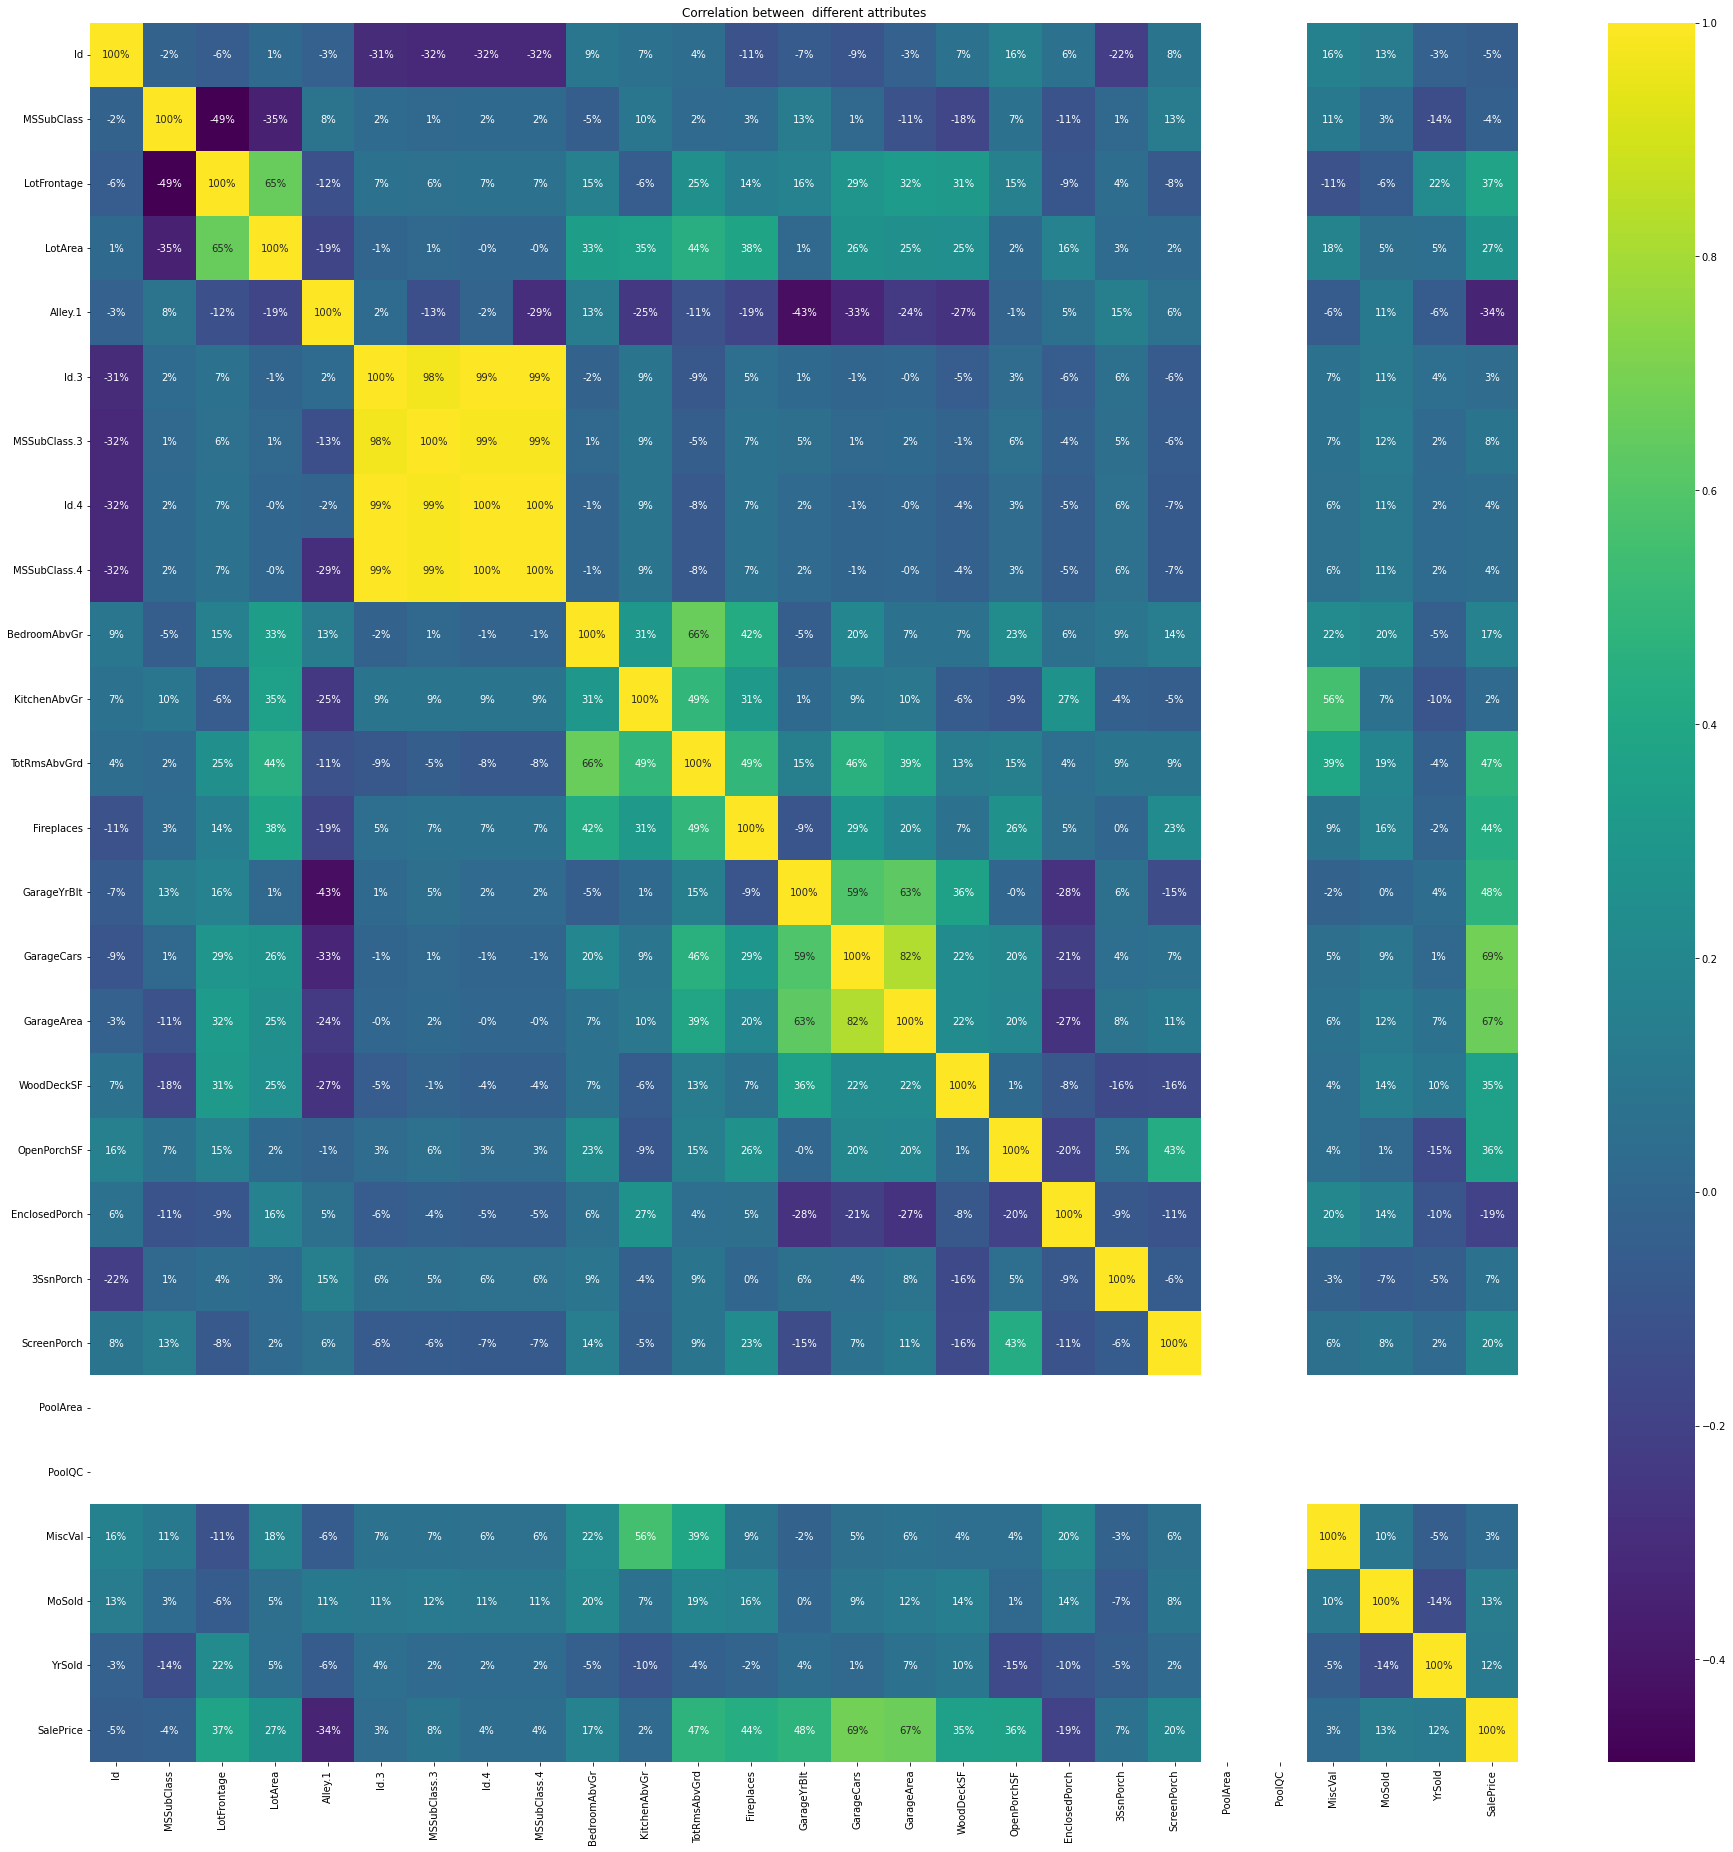

In [154]:
plt.figure(figsize=(32,32))
sns.heatmap(train.corr(),annot=True,fmt='.0%',cmap='viridis')
plt.title('Correlation between  different attributes')

In [158]:
plt.show()


In [159]:
df['SalePrice'].fillna(df['SalePrice'].mean(),inplace=True)


In [160]:
categorical_features=[col for col in df.columns if df[col].dtype=='O']


In [161]:
categorical_features


['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Id.1',
 'MSSubClass.1',
 'MSZoning.1',
 'LotFrontage.1',
 'LotArea.1',
 'Street.1',
 'LotShape.1',
 'LandContour.1',
 'Utilities.1',
 'LotConfig.1',
 'LandSlope.1',
 'Id.2',
 'MSSubClass.2',
 'MSZoning.2',
 'LotFrontage.2',
 'LotArea.2',
 'Street.2',
 'Alley.2',
 'LotShape.2',
 'LandContour.2',
 'Utilities.2',
 'LotConfig.2',
 'LandSlope.2',
 'MSZoning.3',
 'LotFrontage.3',
 'LotArea.3',
 'Street.3',
 'Alley.3',
 'LotShape.3',
 'LandContour.3',
 'Utilities.3',
 'LotConfig.3',
 'LandSlope.3',
 'MSZoning.4',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',


In [162]:
for i in categorical_features:
    temp=df.groupby(i)['SalePrice'].count()/len(df)
    temp_df=temp[temp>0.01].index
    df[i]=np.where(df[i].isin(temp_df),df[i],'Rare_var')


In [163]:
df.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0  127         120       RL    67.503067     4928   Pave      IR1         Lvl   
1  889          20       RL    95.000000    15865   Pave      IR1         Lvl   
2  793          60       RL    92.000000     9920   Pave      IR1         Lvl   
3  110          20       RL   105.000000    11751   Pave      IR1         Lvl   
4  422          20       RL    67.503067    16635   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope      Id.1 MSSubClass.1 MSZoning.1  \
0    AllPub    Inside       Gtl  Rare_var     Rare_var         RL   
1    AllPub    Inside       Mod  Rare_var     Rare_var         RL   
2    AllPub   CulDSac       Gtl  Rare_var     Rare_var         RL   
3    AllPub    Inside       Gtl  Rare_var     Rare_var         RL   
4    AllPub       FR2       Gtl  Rare_var     Rare_var         RL   

  LotFrontage.1 LotArea.1 Street.1  Alley.1 LotShape.1 LandContour.1  \
0      Rare_var  Rare_var     Pave      NaN        IR1           Lvl   
1      Rare_var  Rare_var     Pave      NaN        IR1           Lvl   
2      Rare_var  Rare_var     Pave      NaN        IR1           Lvl   
3      Rare_var  Rare_var     Pave      NaN        IR1           Lvl   
4      Rare_var  Rare_var     Pave      NaN        IR1           Lvl   

  Utilities.1 LotConfig.1 LandSlope.1      Id.2 MSSubClass.2 MSZoning.2  \
0      AllPub      Inside         Gtl  Rare_var     Rare_var         RL   
1      AllPub      Inside    Rare_var  Rare_var     Rare_var         RL   
2      AllPub     CulDSac         Gtl  Rare_var     Rare_var         RL   
3      AllPub      Inside         Gtl  Rare_var     Rare_var         RL   
4      AllPub    Rare_var         Gtl  Rare_var     Rare_var         RL   

  LotFrontage.2 LotArea.2 Street.2   Alley.2 LotShape.2 LandContour.2  \
0      Rare_var  Rare_var     Pave  Rare_var        IR1           Lvl   
1      Rare_var  Rare_var     Pave  Rare_var        IR1           Lvl   
2      Rare_var  Rare_var     Pave  Rare_var        IR1           Lvl   
3      Rare_var  Rare_var     Pave  Rare_var        IR1           Lvl   
4      Rare_var  Rare_var     Pave  Rare_var        IR1           Lvl   

  Utilities.2 LotConfig.2 LandSlope.2    Id.3  MSSubClass.3 MSZoning.3  \
0      AllPub      Inside         Gtl    85.0          78.0         RL   
1      AllPub      Inside    Rare_var -4325.0       -5194.0         RL   
2      AllPub     CulDSac         Gtl -3605.0       -4338.0         RL   
3      AllPub      Inside         Gtl  -430.0        -520.0         RL   
4      AllPub    Rare_var         Gtl -1990.0       -2392.0         RL   

  LotFrontage.3 LotArea.3 Street.3   Alley.3 LotShape.3 LandContour.3  \
0      Rare_var  Rare_var     Pave  Rare_var        IR1           Lvl   
1      Rare_var  Rare_var     Pave  Rare_var        IR1           Lvl   
2      Rare_var  Rare_var     Pave  Rare_var        IR1           Lvl   
3      Rare_var  Rare_var     Pave  Rare_var        IR1           Lvl   
4      Rare_var  Rare_var     Pave  Rare_var        IR1           Lvl   

  Utilities.3 LotConfig.3 LandSlope.3    Id.4  MSSubClass.4 MSZoning.4  \
0      AllPub      Inside         Gtl    71.0          64.0         RL   
1      AllPub      Inside    Rare_var -6063.0       -6932.0         RL   
2      AllPub     CulDSac         Gtl -5071.0       -5804.0         RL   
3      AllPub      Inside         Gtl  -610.0        -700.0         RL   
4      AllPub    Rare_var         Gtl -2794.0       -3196.0         RL   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             2             1          TA             5        Typ   
1             4             1          Gd             8        Typ   
2             3             1          TA             8        Typ   
3             3             1          TA             7        Typ   
4             3             1          Gd             8        Typ   

   Fireplaces GarageType  Gar

In [164]:
for i in categorical_features:
    labels_ordered=df.groupby([i])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[i]=df[i].map(labels_ordered)

In [165]:
y = df['SalePrice']
x = df.drop('SalePrice', axis=1)

In [166]:
print(x.shape, y.shape)


(199, 114) (199,)


In [167]:
print(x.shape, y.shape)


(199, 114) (199,)


In [168]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)
x.shape

(199, 114)

In [169]:
x

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0     127         120         3    67.503067     4928       1         2   
1     889          20         3    95.000000    15865       1         2   
2     793          60         3    92.000000     9920       1         2   
3     110          20         3   105.000000    11751       1         2   
4     422          20         3    67.503067    16635       1         2   
5    1197          60         3    58.000000    14054       1         2   
6     561          20         3    67.503067    11341       1         2   
7    1041          20         3    88.000000    13125       1         0   
8     503          20         3    70.000000     9170       1         0   
9     576          50         3    80.000000     8480       1         0   
10    449          50         1    50.000000     8600       1         0   
11    833          60         3    44.000000     9548       1         2   
12    277          20         3   129.000000     9196       1         2   
13     84          20         3    80.000000     8892       1         2   
14    888          50         3    59.000000    16466       1         2   
15   1013          70         3    55.000000    10592       1         0   
16   1154          30         1    67.503067     5890       1         0   
17    728          20         3    64.000000     7314       1         0   
18    270          20         3    67.503067     7917       1         2   
19   1105         160         1    24.000000     2016       1         0   
20    259          60         3    80.000000    12435       1         0   
21   1407          85         3    70.000000     8445       1         0   
22   1459          20         3    68.000000     9717       1         0   
23    997          20         3    67.503067    10659       1         2   
24   1094          20         3    71.000000     9230       1         0   
25    114          20         3    67.503067    21000       1         0   
26   1384          30         3    67.503067    25339       1         0   
27    379          20         3    88.000000    11394       1         0   
28    556          45         1    58.000000     6380       1         0   
29    464          70         3    74.000000    11988       1         2   
30     46         120         3    61.000000     7658       1         0   
31    426          60         1    60.000000     3378       1         0   
32   1231          90         3    67.503067    18890       1         2   
33    171          50         1    67.503067    12358       1         2   
34    869          60         3    67.503067    14762       1         1   
35    151          20         3   120.000000    10356       1         0   
36    859          20         3    80.000000    10400       1         0   
37    176          20         3    84.000000    12615       1         0   
38    361          85         3    67.503067     7540       1         2   
39    590          40         1    50.000000     9100       1         0   
40    172          20         3   141.000000    31770       1         2   
41    527          20         3    70.000000    13300       1         0   
42   1365         160         2    30.000000     3180       1         0   
43    146         160         1    24.000000     2522       1         0   
44   1006          80         3    65.000000     8385       1         0   
45    275          20         3    76.000000     8314       1         0   
46    380          60         3    60.000000     8123       1         2   
47   1309          20         1   100.000000    12000       1         0   
48    534          20         3    50.000000     5000       1         0   
49    494          20         3    70.000000     7931       1         0   
50    701          20         3    85.000000    14331       1         0   
51   1329          50         1    60.000000    10440       1         0   
52   1101          30         3 

In [170]:
y

0      128000.000000
1      268000.000000
2      269790.000000
3      190000.000000
4      215000.000000
5      219210.000000
6      121500.000000
7      155000.000000
8      140000.000000
9      118500.000000
10     119500.000000
11     237000.000000
12     201000.000000
13     126500.000000
14     135500.000000
15     165000.000000
16     120500.000000
17     194500.000000
18     148000.000000
19     106000.000000
20     231500.000000
21     133000.000000
22     142125.000000
23     136500.000000
24     146000.000000
25     217000.000000
26     112000.000000
27     394432.000000
28     113000.000000
29     188700.000000
30     319900.000000
31     135000.000000
32     190000.000000
33     128500.000000
34     169000.000000
35     122000.000000
36     152000.000000
37     243000.000000
38     156000.000000
39      79500.000000
40     215000.000000
41     132000.000000
42     144152.000000
43     130000.000000
44     149900.000000
45     124500.000000
46     179000.000000
47     147000

In [175]:
#Using GridSearchCV to find out the best parameter in Lasso

alpha_value={'alpha':[.1,.01,.001,.0001,.0]}
model_test= Lasso()
grid=GridSearchCV(estimator=model_test, param_grid=alpha_value)

In [173]:
grid.fit(x_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)
print('/n')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
#Using GridSearchCV to find out the best parameter in Ridge

alpha_value1={'alpha':[.1,.01,.001,.0001,0]}
model_test1= Ridge()
grid=GridSearchCV(estimator=model_test1, param_grid=alpha_value1)

In [174]:
grid.fit(x_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)
print('/n')


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
#Using GridSearchCV to find out the best parameters in RandomForestRegressor

esti_n={'n_estimators':[10,50,100,200]}
model_test2=RandomForestRegressor()
grid=GridSearchCV(model_test2,param_grid=esti_n)

In [ ]:
grid.fit(x_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)
print('/n')


In [ ]:
#Using GridSearchCV to find out the best parameter in GradientBoostingRegressor

GBR_Esti={'n_estimators':[10,100,200,300]}
model_test2=GradientBoostingRegressor()
grid=GridSearchCV(model_test2,param_grid=GBR_Esti)

grid.fit(x_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)
print('/n')

In [ ]:
#Using GridSearchCV to find out the best parameters in ExtraTreesRegressor

ETR_Esti={'n_estimators':[10,50,100,200,150,250,300]}
model_test3=ExtraTreesRegressor()

grid=GridSearchCV(model_test2,param_grid=ETR_Esti)

In [ ]:
grid.fit(x_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)
print('/n')


In [ ]:
import sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error,explained_variance_score,r2_score,mean_tweedie_deviance

import warnings
warnings.filterwarnings('ignore')

model=[LinearRegression(), Lasso(alpha=.1),Ridge(alpha=.1),KNeighborsRegressor(),DecisionTreeRegressor(),
      RandomForestRegressor(n_estimators=200),AdaBoostRegressor(),
       GradientBoostingRegressor(n_estimators=100),ExtraTreesRegressor(n_estimators=50)]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    score=m.score(x_train,y_train)

    predm=m.predict(x_test)
    print(' Score = \n',m,'is :',score )
    print('R2_Score',r2_score(y_test,predm))
    print('EVS',explained_variance_score(y_test,predm))
    print('MAE',mean_absolute_error(y_test,predm))
    print('MSE',mean_squared_error(y_test,predm))
    print('MTD',mean_tweedie_deviance(y_test,predm))
    print('R_MSE:',np.sqrt(mean_squared_error(y_test,predm)))

    print('\n')

